In [ ]:
# loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from pylab import *
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy import stats
from itertools import combinations
from scipy.stats import ttest_ind

In [3]:
jan=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\yellow_tripdata_2018-01.csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']))

In [52]:
feb=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\yellow_tripdata_2018-02.csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']))

In [6]:
mar=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\yellow_tripdata_2018-03.csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']))

In [2]:
apr=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\yellow_tripdata_2018-04.csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']))

In [2]:
may=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\yellow_tripdata_2018-05.csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']))

In [2]:
jun=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\yellow_tripdata_2018-06.csv",
                             usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']))

In [3]:
# This column will be used for checking the dates
#feb['Year_m']= pd.Series([s[0:7] for s in feb['tpep_pickup_datetime'].values],index=feb.index)
#mar['Year_m']= pd.Series([s[0:7] for s in mar['tpep_pickup_datetime'].values],index=mar.index)
#apr['Year_m']= pd.Series([s[0:7] for s in apr['tpep_pickup_datetime'].values],index=apr.index)
#may['Year_m']= pd.Series([s[0:7] for s in may['tpep_pickup_datetime'].values],index=may.index)
jun['Year_m']= pd.Series([s[0:7] for s in jun['tpep_pickup_datetime'].values],index=jun.index)

In [4]:
taxi_zone_lookup=pd.DataFrame(pd.read_csv("C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\taxi _zone_lookup.csv"))

In [6]:
jan['Year_m']= pd.Series([s[0:7] for s in jan['tpep_pickup_datetime'].values],index=jan.index)

In [7]:
jan=jan.drop(jan[jan.Year_m !='2018-01'].index)

In [5]:
#cleaning the wrong dates
#feb=feb.drop(feb[feb.Year_m !='2018-02'].index)
#mar=mar.drop(mar[mar.Year_m !='2018-03'].index)
#apr=apr.drop(apr[apr.Year_m !='2018-04'].index)
#may=may.drop(may[may.Year_m !='2018-05'].index)
jun=jun.drop(jun[jun.Year_m !='2018-06'].index)

In [8]:
m01=jan.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [55]:
m02=feb.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [10]:
m03=mar.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [6]:
m04=apr.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [6]:
m05=may.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [6]:
m06=jun.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [7]:
#m01['Trips']=1
#m02['Trips']=1
#m03['Trips']=1
#m04['Trips']=1
#m05['Trips']=1
m06['Trips']=1

## RQ1

In [20]:
# avg per day monthly
l=[jan,feb,mar,apr,may,jun]
m_avg_val=[]
for x in range(len(l)):
    if (x==0 or x==2 or x==4):
        m_avg_val.append(l[x].shape[0]//31)
    if (x==1):
        m_avg_val.append(l[x].shape[0]//28)
    if (x==3 or x==5):
        m_avg_val.append(l[x].shape[0]//30)
mmm=['jan','feb','mar','apr','may','jun']
dict1={'month':mmm,'avg_num':m_avg_val}
plt0=pd.DataFrame(dict1)

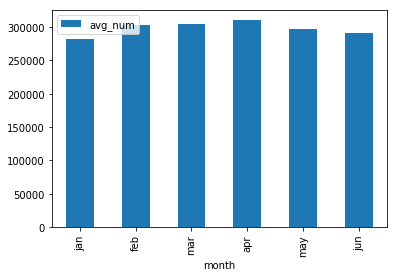

In [22]:
plt0=plt0.set_index(['month'])
plt0.plot.bar()

In [23]:
#calculating by boroughs
m01_q01=pd.DataFrame(m01.groupby(['Borough'])['Trips'].sum())//31
m02_q01=pd.DataFrame(m02.groupby(['Borough'])['Trips'].sum())//28
m03_q01=pd.DataFrame(m03.groupby(['Borough'])['Trips'].sum())//31
m04_q01=pd.DataFrame(m04.groupby(['Borough'])['Trips'].sum())//30
m05_q01=pd.DataFrame(m05.groupby(['Borough'])['Trips'].sum())//31
m06_q01=pd.DataFrame(m06.groupby(['Borough'])['Trips'].sum())//30
m01_q01.columns=['Jan']
m02_q01.columns=['Feb']
m03_q01.columns=['Mar']
m04_q01.columns=['Apr']
m05_q01.columns=['May']
m06_q01.columns=['Jun']

In [24]:
m01_02_q01=m01_q01.join(m02_q01)
m01_02_03_q01=m01_02_q01.join(m03_q01)
m01_04_q01=m01_02_03_q01.join(m04_q01)
m01_05_q01=m01_04_q01.join(m05_q01)
m01_06_q01=m01_05_q01.join(m06_q01)

In [25]:
m01_06_q01

,Jan,Feb,Mar,Apr,May,Jun
Borough,,,,,,
Bronx,238,234,333,347,350,340
Brooklyn,3233,3396,3965,3968,3961,4098
EWR,18,17,21,23,24,22
Manhattan,256948,277401,276368,280945,269345,262610
Queens,16996,17303,18218,19876,19703,19157
Staten Island,4,3,4,4,4,5
Unknown,5125,4907,5250,5001,4150,4208


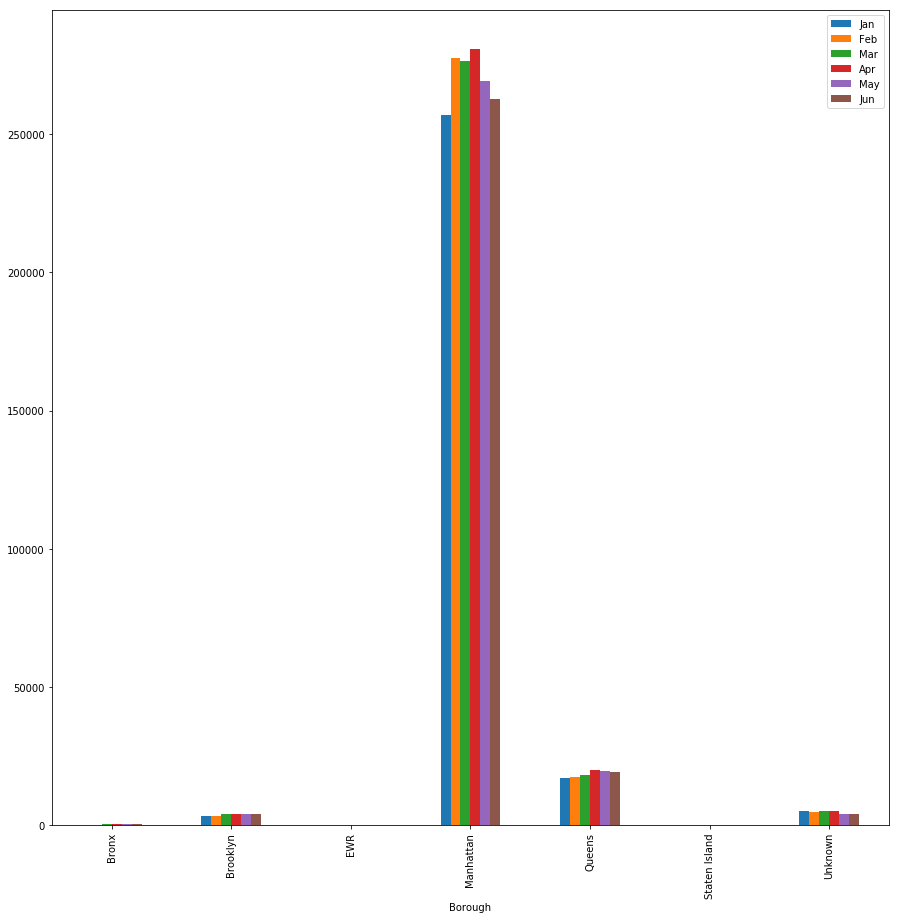

In [27]:
m01_06_q01.plot.bar(figsize=(15,15))

In [41]:
# take table without Manhattan
m01_06_q01b=(m01_06_q01[m01_06_q01.index!='Manhattan'])

In [42]:
m01_06_q01b

,Jan,Feb,Mar,Apr,May,Jun
Borough,,,,,,
Bronx,238,234,333,347,350,340
Brooklyn,3233,3396,3965,3968,3961,4098
EWR,18,17,21,23,24,22
Queens,16996,17303,18218,19876,19703,19157
Staten Island,4,3,4,4,4,5
Unknown,5125,4907,5250,5001,4150,4208


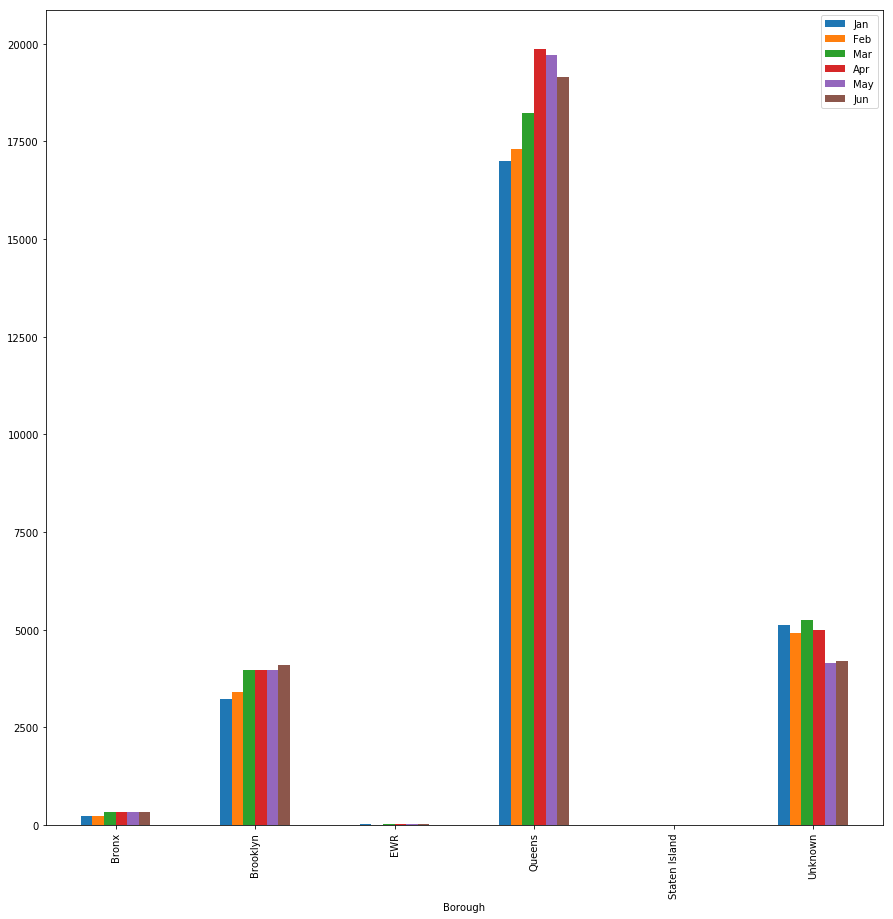

In [44]:
m01_06_q01b.plot.bar(figsize=(15,15))

In [ ]:
## RQ2

In [45]:
# create new column Time, to slice only time value from pickup time
m01['Time']=[d[11:] for d in m01['tpep_pickup_datetime']]
m02['Time']=[d[11:] for d in m02['tpep_pickup_datetime']]
m03['Time']=[d[11:] for d in m03['tpep_pickup_datetime']]
m04['Time']=[d[11:] for d in m04['tpep_pickup_datetime']]
m05['Time']=[d[11:] for d in m05['tpep_pickup_datetime']]
m06['Time']=[d[11:] for d in m06['tpep_pickup_datetime']]

In [46]:
m01['Timeslot'] = np.where(m01['Time'] >= '06:00:00',
                           np.where(m01['Time']<'11:00:00',"1_Morning",
                                   np.where(m01['Time']<'20:00:00', "2_Afternoon",
                                           np.where(m01['Time']<'23:00:00',"3_Evenning","4_Night"))),"4_Night")

In [47]:
m02['Timeslot'] = np.where(m02['Time'] >= '06:00:00',
                           np.where(m02['Time']<'11:00:00',"1_Morning",
                                   np.where(m02['Time']<'20:00:00', "2_Afternoon",
                                           np.where(m02['Time']<'23:00:00',"3_Evenning","4_Night"))),"4_Night")

In [48]:
m03['Timeslot'] = np.where(m03['Time'] >= '06:00:00',
                           np.where(m03['Time']<'11:00:00',"1_Morning",
                                   np.where(m03['Time']<'20:00:00', "2_Afternoon",
                                           np.where(m03['Time']<'23:00:00',"3_Evenning","4_Night"))),"4_Night")

In [49]:
m04['Timeslot'] = np.where(m04['Time'] >= '06:00:00',
                           np.where(m04['Time']<'11:00:00',"1_Morning",
                                   np.where(m04['Time']<'20:00:00', "2_Afternoon",
                                           np.where(m04['Time']<'23:00:00',"3_Evenning","4_Night"))),"4_Night")

In [50]:
m05['Timeslot'] = np.where(m05['Time'] >= '06:00:00',
                           np.where(m05['Time']<'11:00:00',"1_Morning",
                                   np.where(m05['Time']<'20:00:00', "2_Afternoon",
                                           np.where(m05['Time']<'23:00:00',"3_Evenning","4_Night"))),"4_Night")

In [51]:
m06['Timeslot'] = np.where(m06['Time'] >= '06:00:00',
                           np.where(m06['Time']<'11:00:00',"1_Morning",
                                   np.where(m06['Time']<'20:00:00', "2_Afternoon",
                                           np.where(m06['Time']<'23:00:00',"3_Evenning","4_Night"))),"4_Night")

In [52]:
m01['Num_pass']=[pd.to_numeric(x) for x in m01['passenger_count']]

In [53]:
m02['Num_pass']=[pd.to_numeric(x) for x in m02['passenger_count']]

In [54]:
m03['Num_pass']=[pd.to_numeric(x) for x in m03['passenger_count']]

In [55]:
m04['Num_pass']=[pd.to_numeric(x) for x in m04['passenger_count']]

In [56]:
m05['Num_pass']=[pd.to_numeric(x) for x in m05['passenger_count']]

In [57]:
m06['Num_pass']=[pd.to_numeric(x) for x in m06['passenger_count']]

In [91]:
rq02_1=pd.DataFrame(m01.groupby(['Timeslot'])['Num_pass'].sum())
rq02_2=pd.DataFrame(m02.groupby(['Timeslot'])['Num_pass'].sum())
rq02_3=pd.DataFrame(m03.groupby(['Timeslot'])['Num_pass'].sum())
rq02_4=pd.DataFrame(m04.groupby(['Timeslot'])['Num_pass'].sum())
rq02_5=pd.DataFrame(m05.groupby(['Timeslot'])['Num_pass'].sum())
rq02_6=pd.DataFrame(m01.groupby(['Timeslot'])['Num_pass'].sum())

In [92]:
rq02_1.columns=['Jan']
rq02_2.columns=['Feb']
rq02_3.columns=['Mar']
rq02_4.columns=['Apr']
rq02_5.columns=['May']
rq02_6.columns=['Jun']

In [93]:
rq02_2=rq02_1.join(rq02_2)
rq02_3=rq02_2.join(rq02_3)
rq02_4=rq02_3.join(rq02_4)
rq02_5=rq02_4.join(rq02_5)
rq02_6=rq02_5.join(rq02_6)

In [94]:
rq02_6

,Jan,Feb,Mar,Apr,May,Jun
Timeslot,,,,,,
1_Morning,2771428,2642280,2958776,2902503,2927162,2771428
2_Afternoon,7048866,6782350,7404135,7345249,7233683,7048866
3_Evenning,2278290,2250513,2542941,2545751,2501935,2278290
4_Night,1976558,1879105,2192698,2097916,2064771,1976558


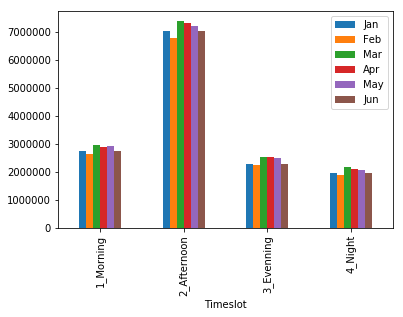

In [95]:
rq02_6.plot.bar()

In [96]:
rq02_01=pd.DataFrame(m01.groupby(['Borough','Timeslot'])['Num_pass'].sum())

In [97]:
rq02_01.columns=['Jan']

In [100]:
rq02_02=pd.DataFrame(m02.groupby(['Borough','Timeslot'])['Num_pass'].sum())
rq02_03=pd.DataFrame(m03.groupby(['Borough','Timeslot'])['Num_pass'].sum())
rq02_04=pd.DataFrame(m04.groupby(['Borough','Timeslot'])['Num_pass'].sum())
rq02_05=pd.DataFrame(m05.groupby(['Borough','Timeslot'])['Num_pass'].sum())
rq02_06=pd.DataFrame(m01.groupby(['Borough','Timeslot'])['Num_pass'].sum())

In [101]:
rq02_02.columns=['Feb']
rq02_03.columns=['Mar']
rq02_04.columns=['Apr']
rq02_05.columns=['May']
rq02_06.columns=['Jun']

In [102]:
rq02_02=rq02_01.join(rq02_02)
rq02_03=rq02_02.join(rq02_03)
rq02_04=rq02_03.join(rq02_04)
rq02_05=rq02_04.join(rq02_05)
rq02_06=rq02_05.join(rq02_06)

In [103]:
rq02_06

Jan      Feb      Mar      Apr      May  \
Borough       Timeslot                                                   
Bronx         1_Morning       3102     2570     5509     5204     5076   
              2_Afternoon     4499     4215     6392     6815     7167   
              3_Evenning       986      937     1599     1662     2166   
              4_Night         2917     2296     3303     3211     3324   
Brooklyn      1_Morning      34513    30326    38370    38173    39004   
              2_Afternoon    49999    48950    64537    63023    64461   
              3_Evenning     25873    26078    33827    32351    37620   
              4_Night        49436    45358    60163    56709    54995   
EWR           1_Morning        169      149      177      176      237   
              2_Afternoon      589      478      645      729      786   
              3_Evenning        61       34       38       77       63   
              4_Night           51       50      108       58       78   
Manhattan     1_Morning    2540193  2430332  2700712  2652679  2666276   
              2_Afternoon  6456224  6243739  6765475  6676384  6569394   
              3_Evenning   2061281  2048489  2304322  2297533  2264439   
              4_Night      1764071  1697785  1967570  1874909  1841502   
Queens        1_Morning     152074   142397   170565   168185   184802   
              2_Afternoon   423840   388968   453429   492453   500623   
              3_Evenning    153597   143555   165956   177703   167220   
              4_Night       125839   105811   127134   132061   137430   
Staten Island 1_Morning         28       17       27       41       31   
              2_Afternoon      108       79       68       69      104   
              3_Evenning        34       23       32       30       16   
              4_Night           63       46       75       56       87   
Unknown       1_Morning      41349    36489    43416    38045    31736   
              2_Afternoon   113607    95921   113589   105776    91148   
              3_Evenning     36458    31397    37167    36395    30411   
              4_Night        34181    27759    34345    30912    27355   

                               Jun  
Borough       Timeslot              
Bronx         1_Morning       3102  
              2_Afternoon     4499  
              3_Evenning       986  
              4_Night         2917  
Brooklyn      1_Morning      34513  
              2_Afternoon    49999  
              3_Evenning     25873  
              4_Night        49436  
EWR           1_Morning        169  
              2_Afternoon      589  
              3_Evenning        61  
              4_Night           51  
Manhattan     1_Morning    2540193  
              2_Afternoon  6456224  
              3_Evenning   2061281  
              4_Night      1764071  
Queens        1_Morning     152074  
              2_Afternoon   423840  
              3_Evenning    153597  
              4_Night       125839  
Staten Island 1_Morning         28  
              2_Afternoon      108  
              3_Evenning        34  
              4_Night           63  
Unknown       1_Morning      41349  
              2_Afternoon   113607  
              3_Evenning     36458  
              4_Night        34181

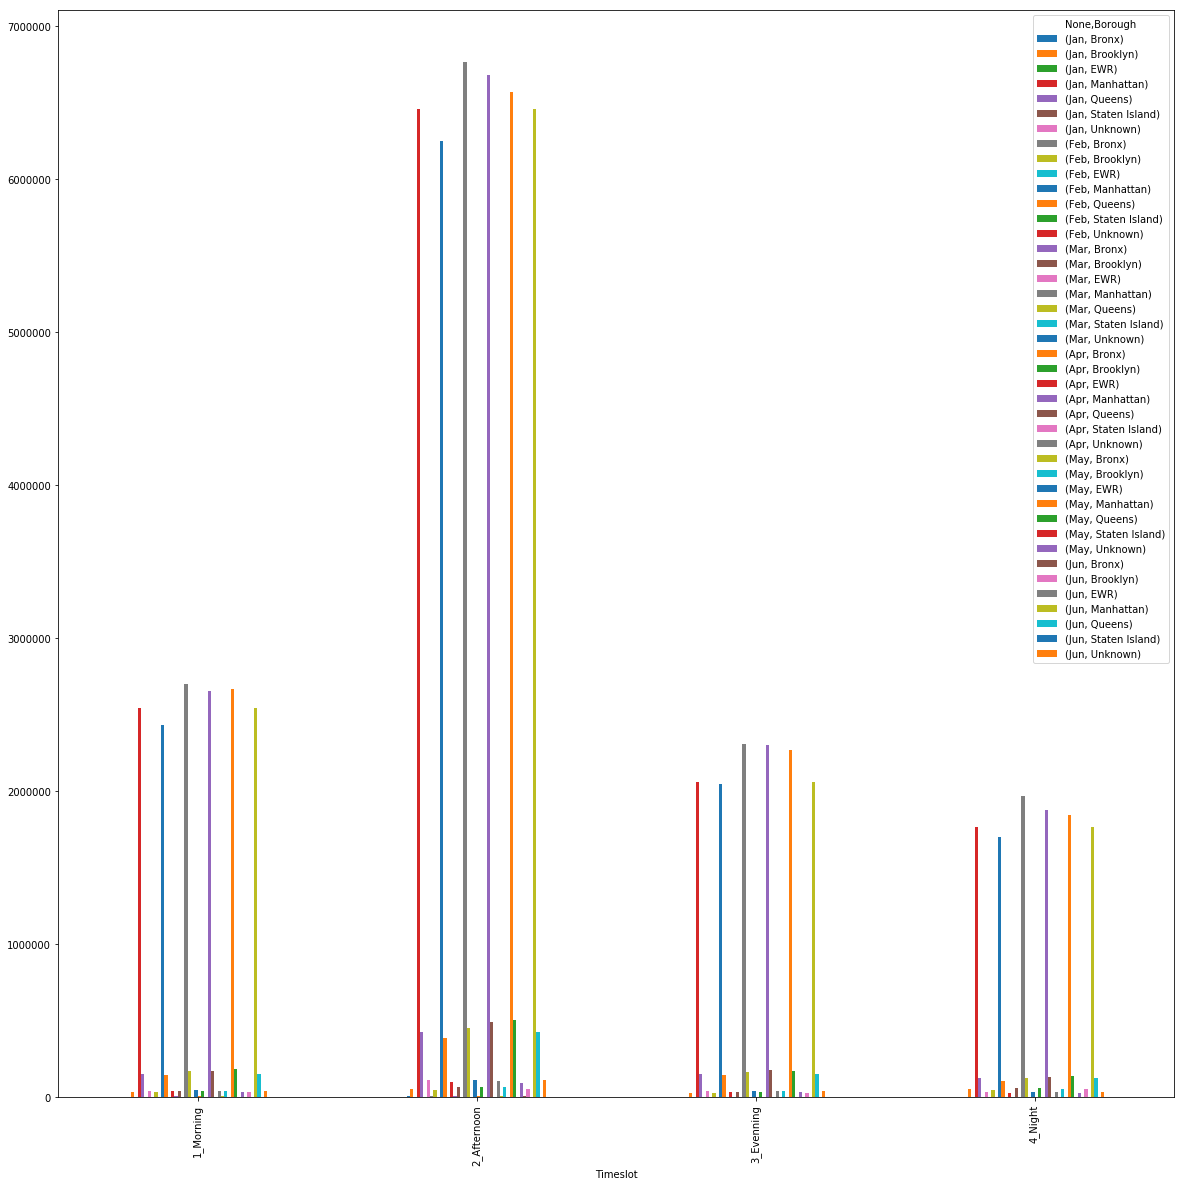

In [128]:
rq02_06.unstack(level = 0).plot(kind = 'bar', subplots = False, figsize = (20,20))

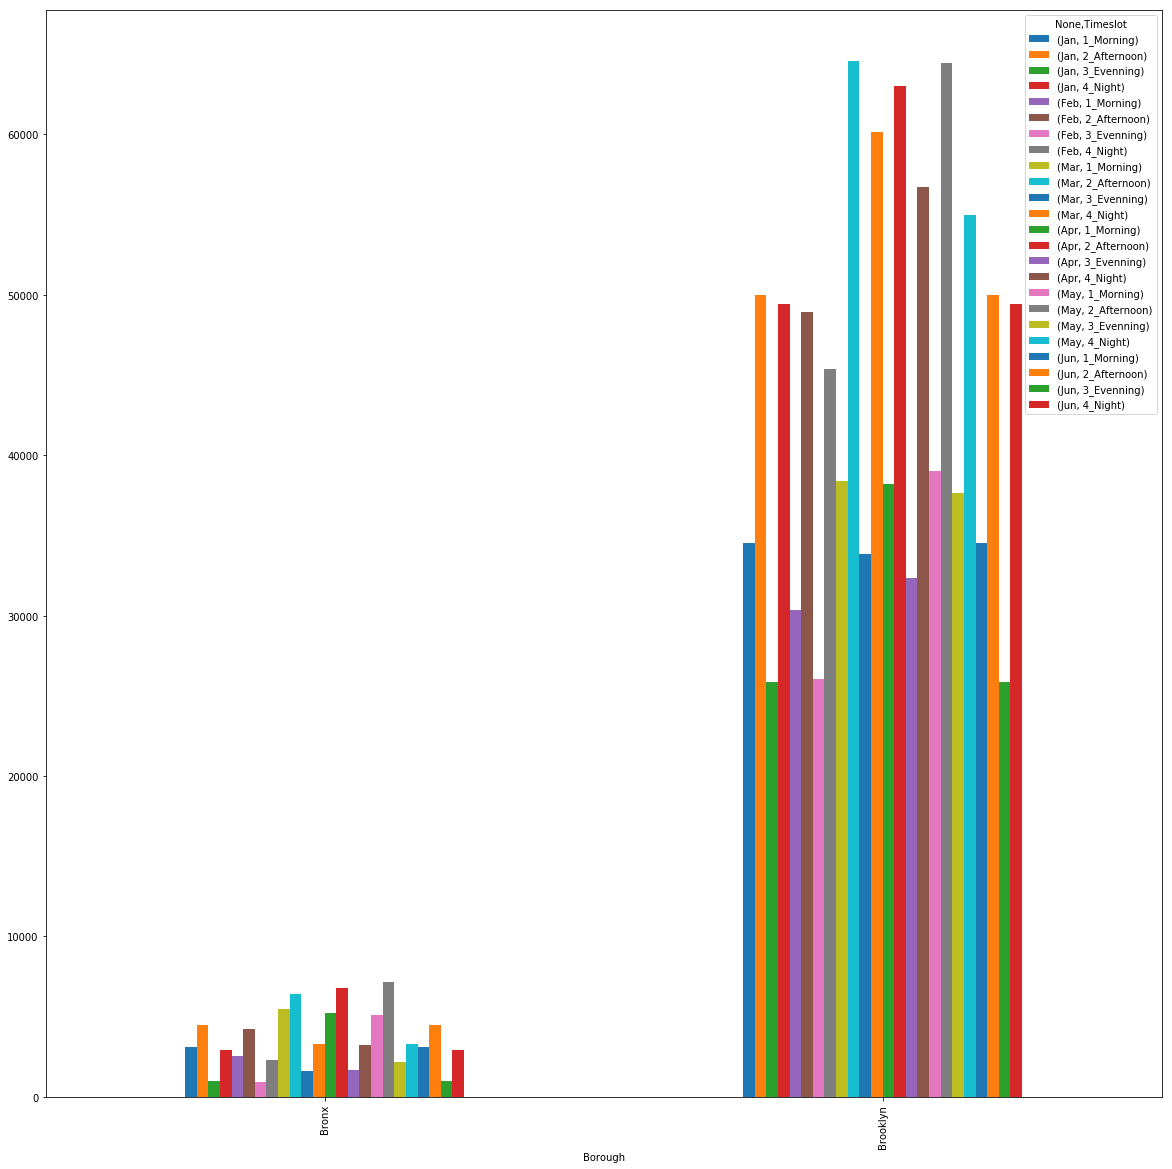

In [127]:
rq02_06.iloc[0:8].unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

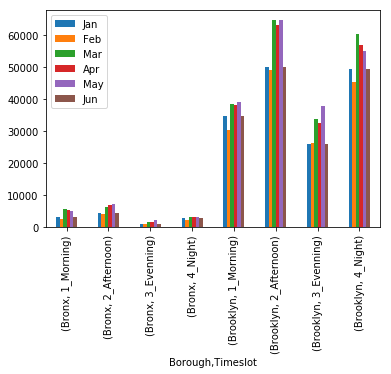

In [107]:
rq02_06.iloc[0:8].plot.bar()

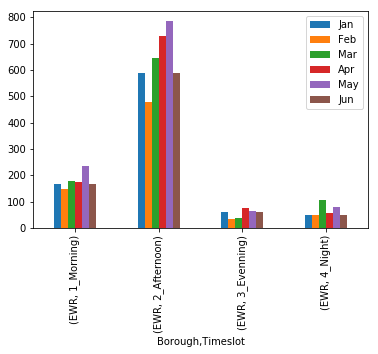

In [111]:
rq02_06.iloc[8:12].plot.bar()

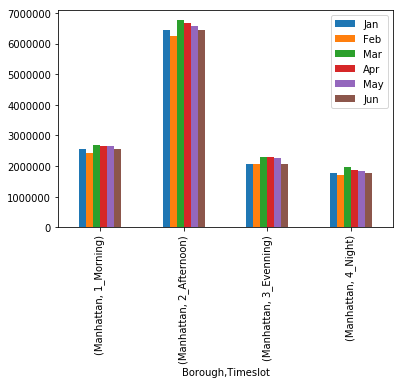

In [112]:
rq02_06.iloc[12:16].plot.bar()

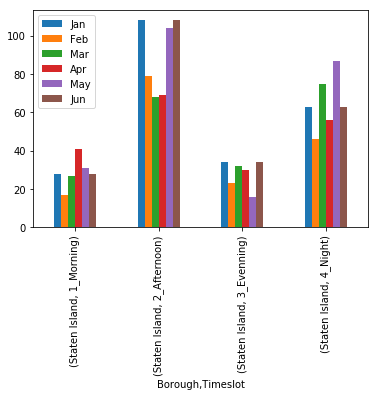

In [116]:
rq02_06.iloc[20:24].plot.bar()

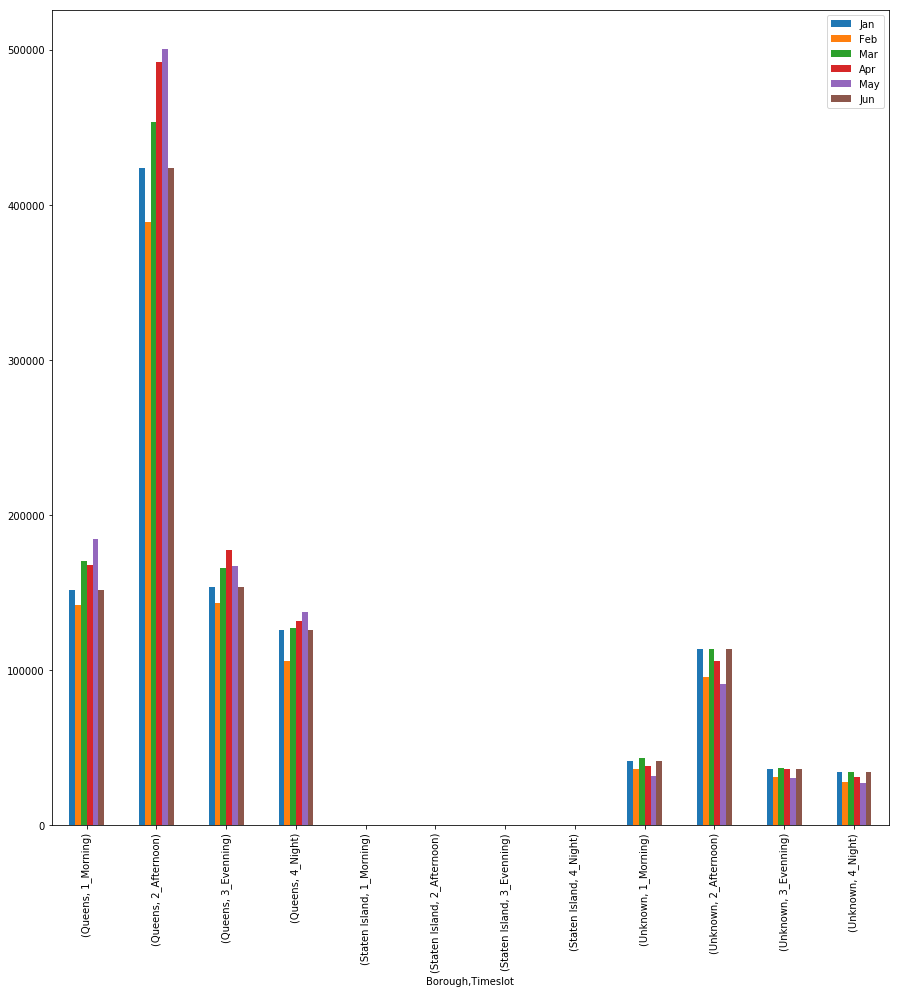

In [117]:
rq02_06.iloc[16:28].plot.bar(figsize=(15,15))

## RQ3

In [9]:
m01['tpep_pickup_datetime_1']= [pd.to_datetime(x) for x in m01['tpep_pickup_datetime']]

In [10]:
m01['tpep_dropoff_datetime_1']= [pd.to_datetime(x) for x in m01['tpep_dropoff_datetime']]

In [57]:
m02['tpep_pickup_datetime_1']= [pd.to_datetime(x) for x in m02['tpep_pickup_datetime']]

In [58]:
m02['tpep_dropoff_datetime_1']= [pd.to_datetime(x) for x in m02['tpep_dropoff_datetime']]

In [12]:
m03['tpep_pickup_datetime_1']= [pd.to_datetime(x) for x in m03['tpep_pickup_datetime']]

In [13]:
m03['tpep_dropoff_datetime_1']= [pd.to_datetime(x) for x in m03['tpep_dropoff_datetime']]

In [8]:
m04['tpep_pickup_datetime_1']= [pd.to_datetime(x) for x in m04['tpep_pickup_datetime']]

In [9]:
m04['tpep_dropoff_datetime_1']= [pd.to_datetime(x) for x in m04['tpep_dropoff_datetime']]

In [8]:
m05['tpep_pickup_datetime_1']= [pd.to_datetime(x) for x in m05['tpep_pickup_datetime']]

In [9]:
m05['tpep_dropoff_datetime_1']= [pd.to_datetime(x) for x in m05['tpep_dropoff_datetime']]

In [8]:
m06['tpep_pickup_datetime_1']= [pd.to_datetime(x) for x in m06['tpep_pickup_datetime']]

In [9]:
m06['tpep_dropoff_datetime_1']= [pd.to_datetime(x) for x in m06['tpep_dropoff_datetime']]

In [11]:
m01['duration']=m01['tpep_dropoff_datetime_1']-m01['tpep_pickup_datetime_1']

In [10]:
#m02['duration']=m02['tpep_dropoff_datetime_1']-m02['tpep_pickup_datetime_1']
#m03['duration']=m03['tpep_dropoff_datetime_1']-m03['tpep_pickup_datetime_1']
#m04['duration']=m04['tpep_dropoff_datetime_1']-m04['tpep_pickup_datetime_1']
#m05['duration']=m05['tpep_dropoff_datetime_1']-m05['tpep_pickup_datetime_1']
m06['duration']=m06['tpep_dropoff_datetime_1']-m06['tpep_pickup_datetime_1']

In [12]:
m01['duration_sec']=[x.days*3600+x.seconds for x in m01['duration']]

In [13]:
m01=m01.drop(m01[m01['duration_sec']==0].index)

In [14]:
m01=m01.drop(m01[m01['trip_distance']<=0].index)

In [19]:
grr=m01[m01['duration_sec']<3001]

In [21]:
grr=grr.drop(grr[grr['duration_sec']<0].index)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


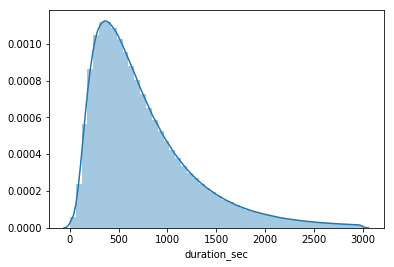

In [22]:
sns.distplot(grr['duration_sec'])

In [23]:
m01['dur_distr']=np.where(m01['duration_sec']<=300,"1_from_0_to_5_min",
                         np.where(m01['duration_sec']<=1500,"2_from_5_min_to_25_min",
                                 np.where(m01['duration_sec']<=3600,"3_from_25_min_to_1_hour",
                                         np.where(m01['duration_sec']<=5400,"4_from_1h_to_1.5h",
                                                 np.where(m01['duration_sec']<=10800,"5_from_1.5h_to_3h","6_more _than_3h")))))

In [26]:
rq03_01=pd.DataFrame(m01.groupby(['dur_distr'])['Trips'].sum())

In [27]:
rq03_01

,Trips
dur_distr,
1_from_0_to_5_min,1428873
2_from_5_min_to_25_min,6339900
3_from_25_min_to_1_hour,873303
4_from_1h_to_1.5h,41495
5_from_1.5h_to_3h,3750
6_more _than_3h,16621


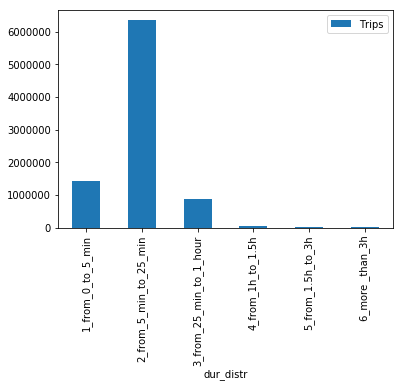

In [29]:
rq03_01.plot.bar()

In [30]:
rq03b_01=pd.DataFrame(m01.groupby(['Borough','dur_distr'])['Trips'].sum())

In [31]:
rq03b_01

Trips
Borough       dur_distr                       
Bronx         1_from_0_to_5_min           1133
              2_from_5_min_to_25_min      4671
              3_from_25_min_to_1_hour      766
              4_from_1h_to_1.5h             55
              5_from_1.5h_to_3h             15
              6_more _than_3h               31
Brooklyn      1_from_0_to_5_min          15649
              2_from_5_min_to_25_min     70415
              3_from_25_min_to_1_hour    11905
              4_from_1h_to_1.5h            273
              5_from_1.5h_to_3h             26
              6_more _than_3h              207
EWR           1_from_0_to_5_min            155
              2_from_5_min_to_25_min        10
              3_from_25_min_to_1_hour       14
              4_from_1h_to_1.5h              3
Manhattan     1_from_0_to_5_min        1363177
              2_from_5_min_to_25_min   5973486
              3_from_25_min_to_1_hour   566396
              4_from_1h_to_1.5h          15832
              5_from_1.5h_to_3h           1517
              6_more _than_3h            14305
Queens        1_from_0_to_5_min          22147
              2_from_5_min_to_25_min    183873
              3_from_25_min_to_1_hour   280270
              4_from_1h_to_1.5h          24727
              5_from_1.5h_to_3h           2116
              6_more _than_3h             1859
Staten Island 1_from_0_to_5_min             35
              2_from_5_min_to_25_min        59
              3_from_25_min_to_1_hour       13
              4_from_1h_to_1.5h              3
              6_more _than_3h                1
Unknown       1_from_0_to_5_min          26577
              2_from_5_min_to_25_min    107386
              3_from_25_min_to_1_hour    13939
              4_from_1h_to_1.5h            602
              5_from_1.5h_to_3h             76
              6_more _than_3h              218

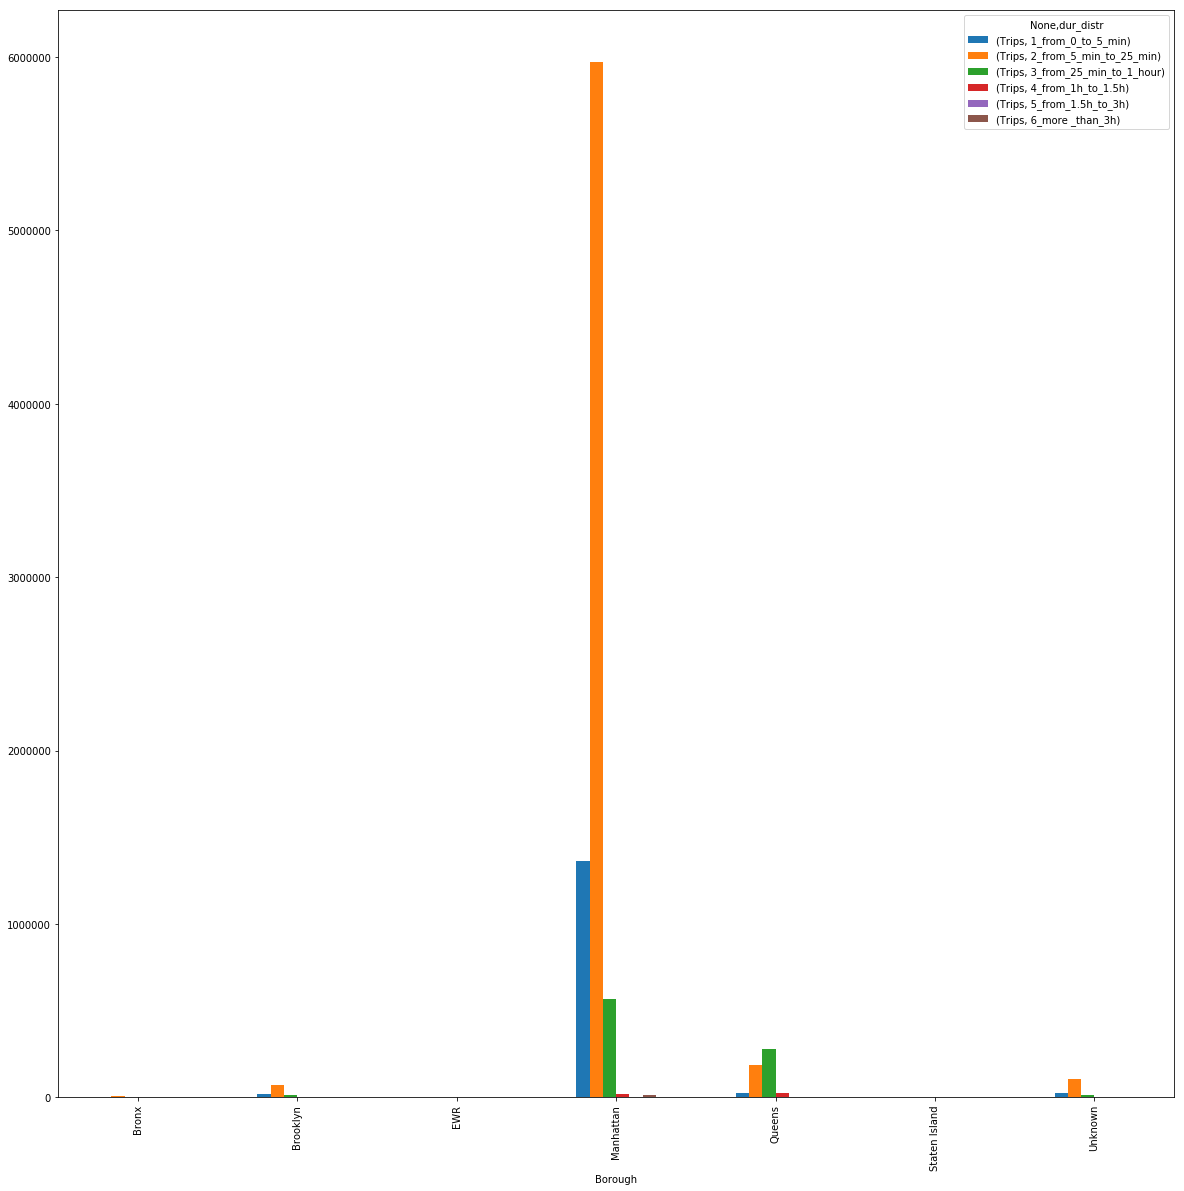

In [32]:
rq03b_01.unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

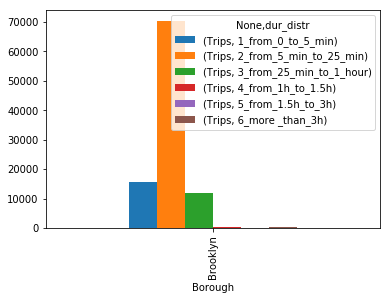

In [38]:
rq03b_01.iloc[6:12].unstack(level = 1).plot(kind = 'bar', subplots = False)

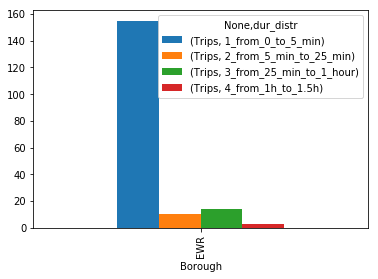

In [40]:
rq03b_01.iloc[12:16].unstack(level = 1).plot(kind = 'bar', subplots = False)

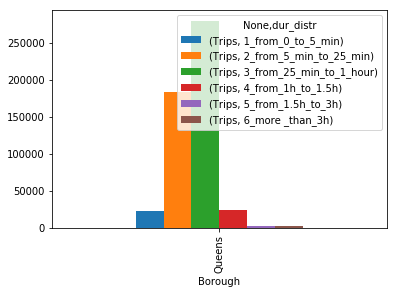

In [47]:
rq03b_01.iloc[22:28].unstack(level = 1).plot(kind = 'bar', subplots = False)

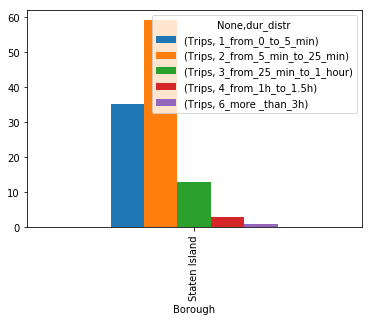

In [51]:
rq03b_01.iloc[28:33].unstack(level = 1).plot(kind = 'bar', subplots = False)

In [60]:
m02['duration_sec']=[x.days*3600+x.seconds for x in m02['duration']]

In [61]:
m02=m02.drop(m02[m02['duration_sec']==0].index)
m02=m02.drop(m02[m02['trip_distance']<=0].index)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


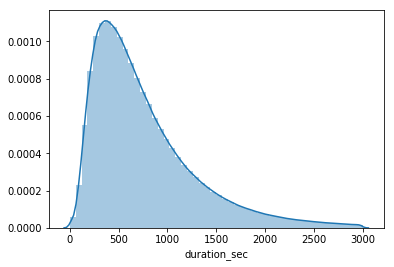

In [62]:
grr=m02[m02['duration_sec']<3001]
grr=grr.drop(grr[grr['duration_sec']<0].index)
sns.distplot(grr['duration_sec'])

In [63]:
m02['dur_distr']=np.where(m02['duration_sec']<=300,"1_from_0_to_5_min",
                         np.where(m02['duration_sec']<=1500,"2_from_5_min_to_25_min",
                                 np.where(m02['duration_sec']<=3600,"3_from_25_min_to_1_hour",
                                         np.where(m02['duration_sec']<=5400,"4_from_1h_to_1.5h",
                                                 np.where(m02['duration_sec']<=10800,"5_from_1.5h_to_3h","6_more _than_3h")))))

In [64]:
rq03_02=pd.DataFrame(m02.groupby(['dur_distr'])['Trips'].sum())

In [65]:
rq03_02

,Trips
dur_distr,
1_from_0_to_5_min,1357851
2_from_5_min_to_25_min,6163013
3_from_25_min_to_1_hour,863220
4_from_1h_to_1.5h,35610
5_from_1.5h_to_3h,2542
6_more _than_3h,16717


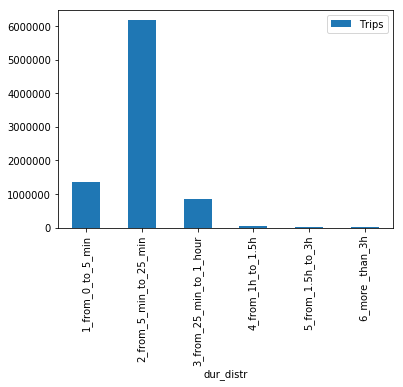

In [66]:
rq03_02.plot.bar()

In [67]:
rq03b_02=pd.DataFrame(m01.groupby(['Borough','dur_distr'])['Trips'].sum())

In [68]:
rq03b_02

Trips
Borough       dur_distr                       
Bronx         1_from_0_to_5_min           1133
              2_from_5_min_to_25_min      4671
              3_from_25_min_to_1_hour      766
              4_from_1h_to_1.5h             55
              5_from_1.5h_to_3h             15
              6_more _than_3h               31
Brooklyn      1_from_0_to_5_min          15649
              2_from_5_min_to_25_min     70415
              3_from_25_min_to_1_hour    11905
              4_from_1h_to_1.5h            273
              5_from_1.5h_to_3h             26
              6_more _than_3h              207
EWR           1_from_0_to_5_min            155
              2_from_5_min_to_25_min        10
              3_from_25_min_to_1_hour       14
              4_from_1h_to_1.5h              3
Manhattan     1_from_0_to_5_min        1363177
              2_from_5_min_to_25_min   5973486
              3_from_25_min_to_1_hour   566396
              4_from_1h_to_1.5h          15832
              5_from_1.5h_to_3h           1517
              6_more _than_3h            14305
Queens        1_from_0_to_5_min          22147
              2_from_5_min_to_25_min    183873
              3_from_25_min_to_1_hour   280270
              4_from_1h_to_1.5h          24727
              5_from_1.5h_to_3h           2116
              6_more _than_3h             1859
Staten Island 1_from_0_to_5_min             35
              2_from_5_min_to_25_min        59
              3_from_25_min_to_1_hour       13
              4_from_1h_to_1.5h              3
              6_more _than_3h                1
Unknown       1_from_0_to_5_min          26577
              2_from_5_min_to_25_min    107386
              3_from_25_min_to_1_hour    13939
              4_from_1h_to_1.5h            602
              5_from_1.5h_to_3h             76
              6_more _than_3h              218

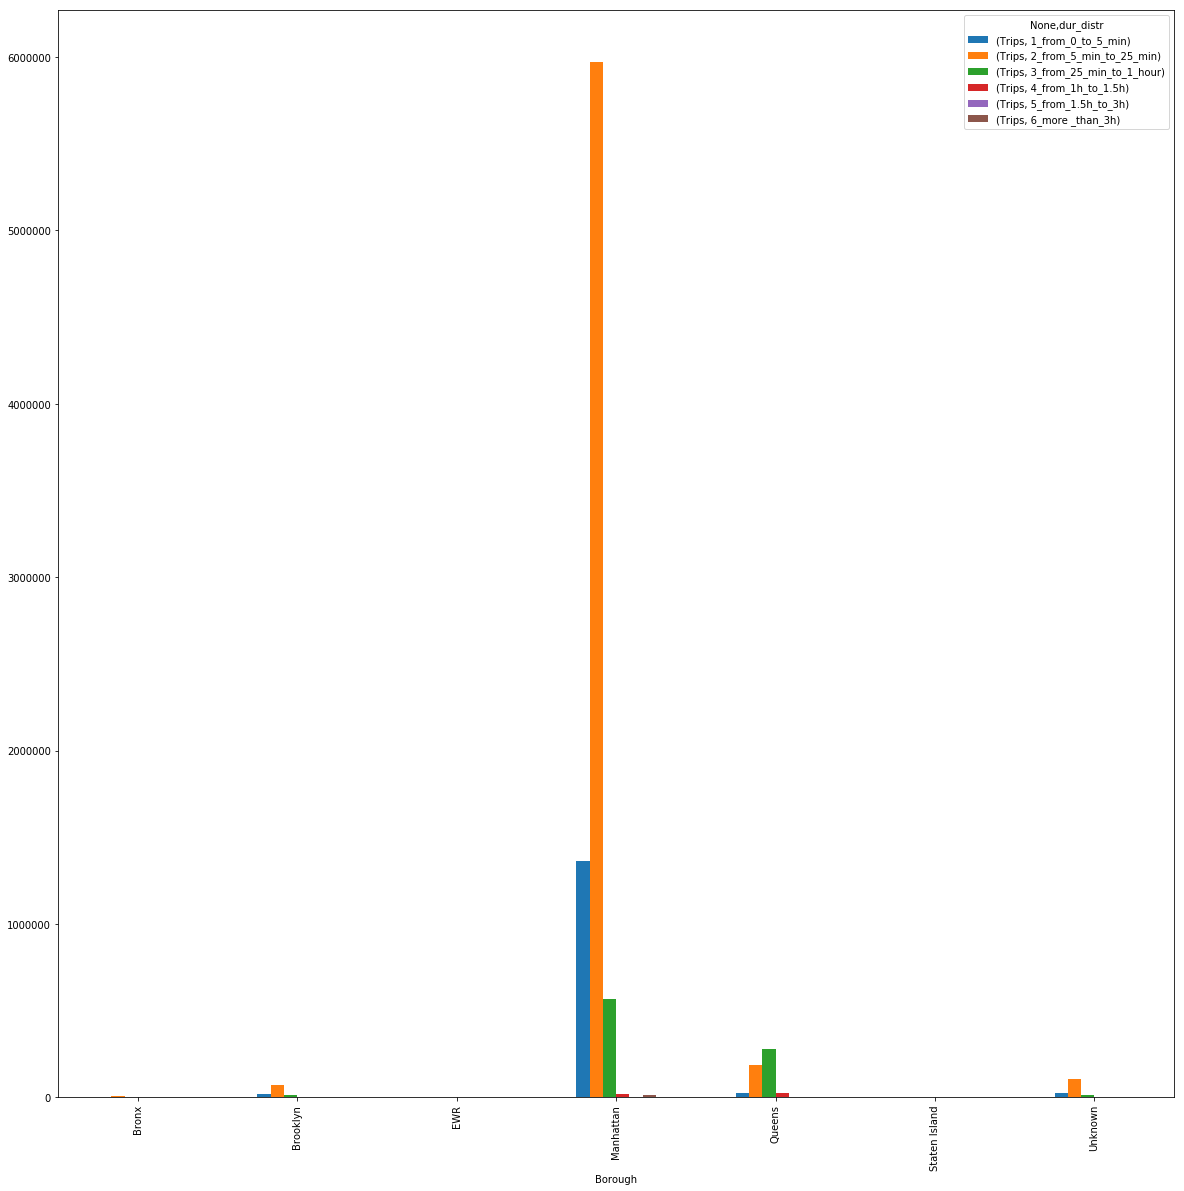

In [69]:
rq03b_02.unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

In [73]:
#m02.to_csv("m02_1.csv", encoding='utf-8', index=False)

In [72]:
#m01.to_csv("m01_1.csv", encoding='utf-8', index=False)

In [2]:
#m01=pd.DataFrame(pd.read_csv("m01_1.csv"))

In [14]:
m03['duration']=m03['tpep_dropoff_datetime_1']-m03['tpep_pickup_datetime_1']

In [15]:
m03['duration_sec']=[x.days*3600+x.seconds for x in m03['duration']]

In [16]:
m03['dur_distr']=np.where(m03['duration_sec']<=300,"1_from_0_to_5_min",
                         np.where(m03['duration_sec']<=1500,"2_from_5_min_to_25_min",
                                 np.where(m03['duration_sec']<=3600,"3_from_25_min_to_1_hour",
                                         np.where(m03['duration_sec']<=5400,"4_from_1h_to_1.5h",
                                                 np.where(m03['duration_sec']<=10800,"5_from_1.5h_to_3h","6_more _than_3h")))))

In [17]:
#m03.to_csv("m03_1.csv", encoding='utf-8', index=False)

In [42]:
m03=m03.drop(m03[m03['duration_sec']==0].index)
m03=m03.drop(m03[m03['trip_distance']<=0].index)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


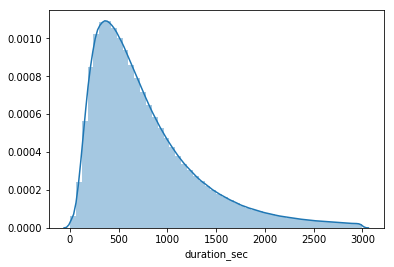

In [19]:
grr=m03[m03['duration_sec']<3001]
grr=grr.drop(grr[grr['duration_sec']<0].index)
sns.distplot(grr['duration_sec'])

In [20]:
rq03_03=pd.DataFrame(m03.groupby(['dur_distr'])['Trips'].sum())

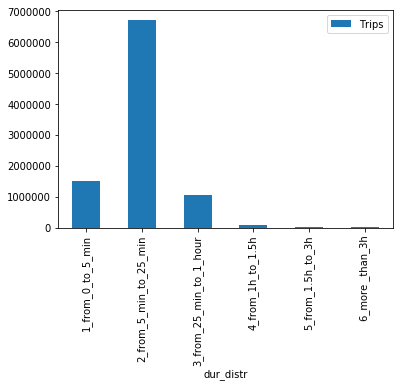

In [21]:
rq03_03.plot.bar()

In [22]:
rq03_03=pd.DataFrame(m03.groupby(['Borough','dur_distr'])['Trips'].sum())

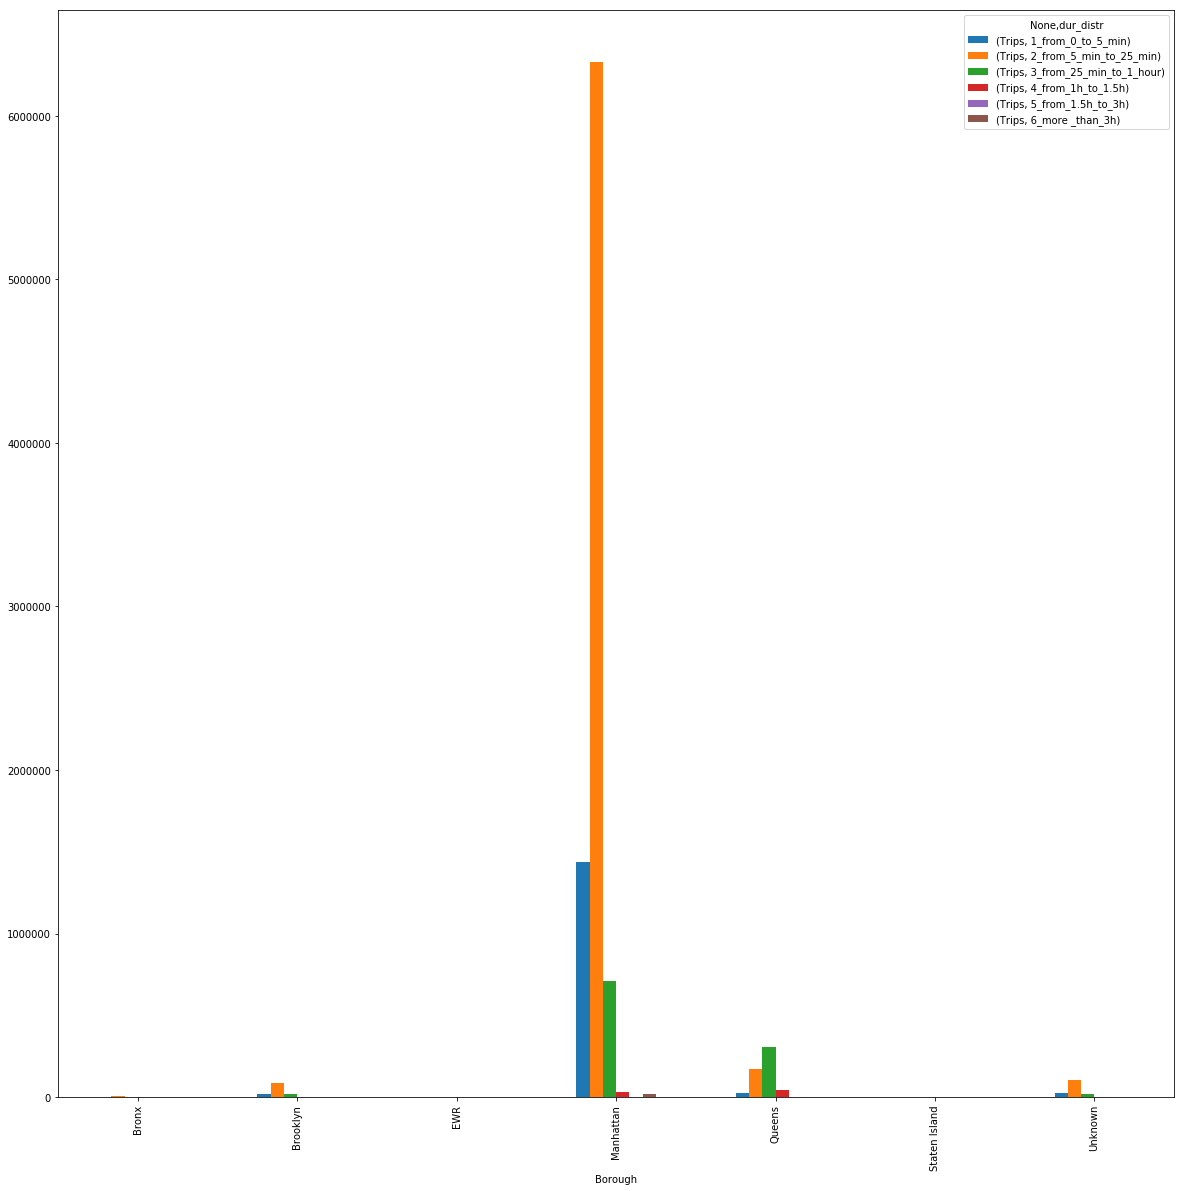

In [23]:
rq03_03.unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

In [11]:
m04['duration_sec']=[x.days*3600+x.seconds for x in m04['duration']]

In [12]:
m04=m04.drop(m04[m04['duration_sec']==0].index)
m04=m04.drop(m04[m04['trip_distance']<=0].index)

In [13]:
m04.to_csv("m04_1.csv", encoding='utf-8', index=False)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


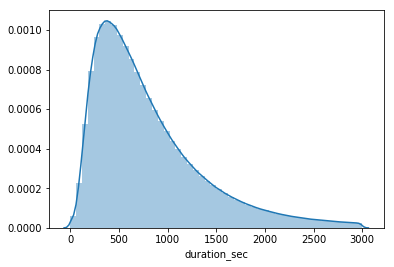

In [14]:
grr=m04[m04['duration_sec']<3001]
grr=grr.drop(grr[grr['duration_sec']<0].index)
sns.distplot(grr['duration_sec'])

In [17]:
m04['dur_distr']=np.where(m04['duration_sec']<=300,"1_from_0_to_5_min",
                         np.where(m04['duration_sec']<=1500,"2_from_5_min_to_25_min",
                                 np.where(m04['duration_sec']<=3600,"3_from_25_min_to_1_hour",
                                         np.where(m04['duration_sec']<=5400,"4_from_1h_to_1.5h",
                                                 np.where(m04['duration_sec']<=10800,"5_from_1.5h_to_3h","6_more _than_3h")))))

In [18]:
rq03_04=pd.DataFrame(m04.groupby(['dur_distr'])['Trips'].sum())

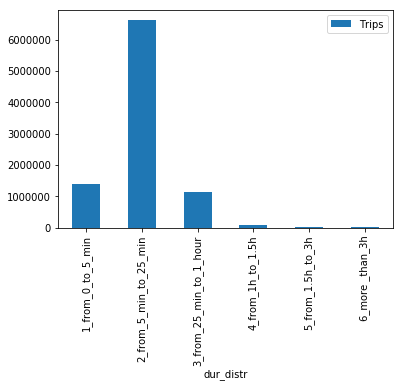

In [19]:
rq03_04.plot.bar()

In [22]:
rq03b_04=pd.DataFrame(m04.groupby(['Borough','dur_distr'])['Trips'].sum())

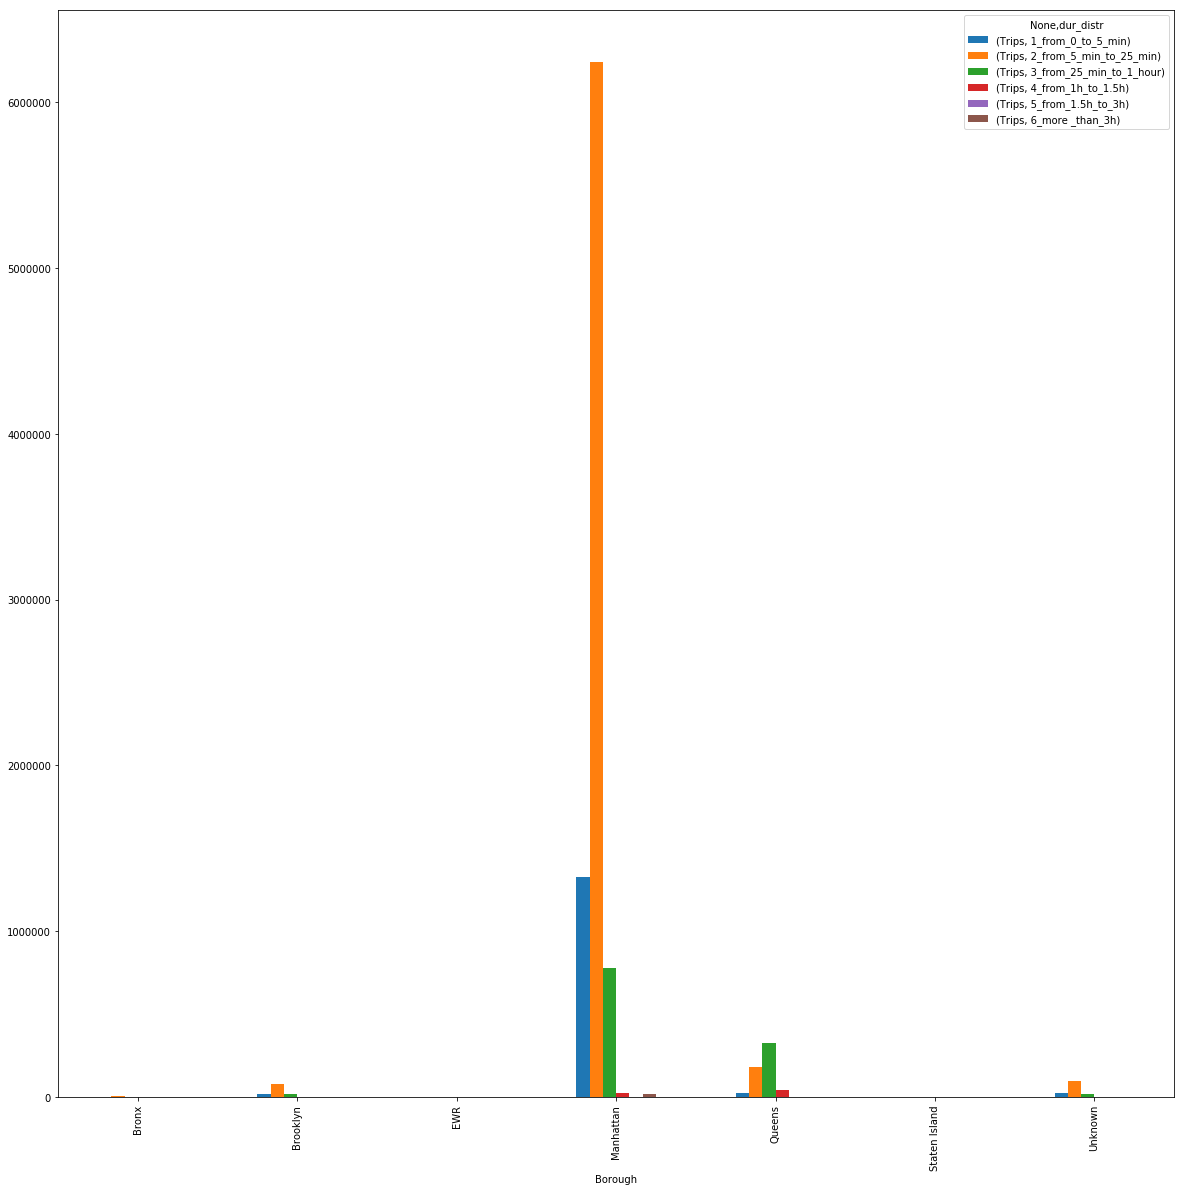

In [23]:
rq03b_04.unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

In [11]:
m05['duration_sec']=[x.days*3600+x.seconds for x in m05['duration']]

In [12]:
m05=m05.drop(m05[m05['duration_sec']==0].index)
m05=m05.drop(m05[m05['trip_distance']<=0].index)

In [13]:
#m05.to_csv("m05_1.csv", encoding='utf-8', index=False)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


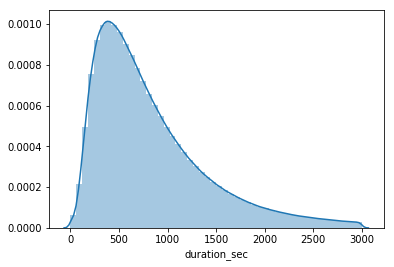

In [14]:
grr=m05[m05['duration_sec']<3001]
grr=grr.drop(grr[grr['duration_sec']<0].index)
sns.distplot(grr['duration_sec'])

In [15]:
m05['dur_distr']=np.where(m05['duration_sec']<=300,"1_from_0_to_5_min",
                         np.where(m05['duration_sec']<=1500,"2_from_5_min_to_25_min",
                                 np.where(m05['duration_sec']<=3600,"3_from_25_min_to_1_hour",
                                         np.where(m05['duration_sec']<=5400,"4_from_1h_to_1.5h",
                                                 np.where(m05['duration_sec']<=10800,"5_from_1.5h_to_3h","6_more _than_3h")))))

In [17]:
rq03_05=pd.DataFrame(m05.groupby(['dur_distr'])['Trips'].sum())

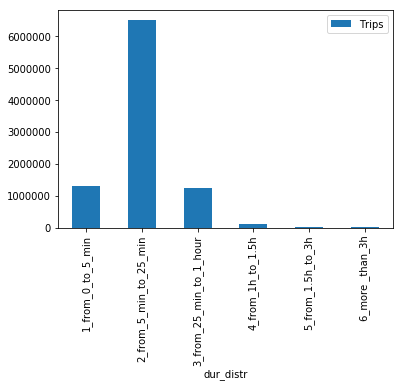

In [18]:
rq03_05.plot.bar()

In [20]:
rq03b_05=pd.DataFrame(m05.groupby(['Borough','dur_distr'])['Trips'].sum())

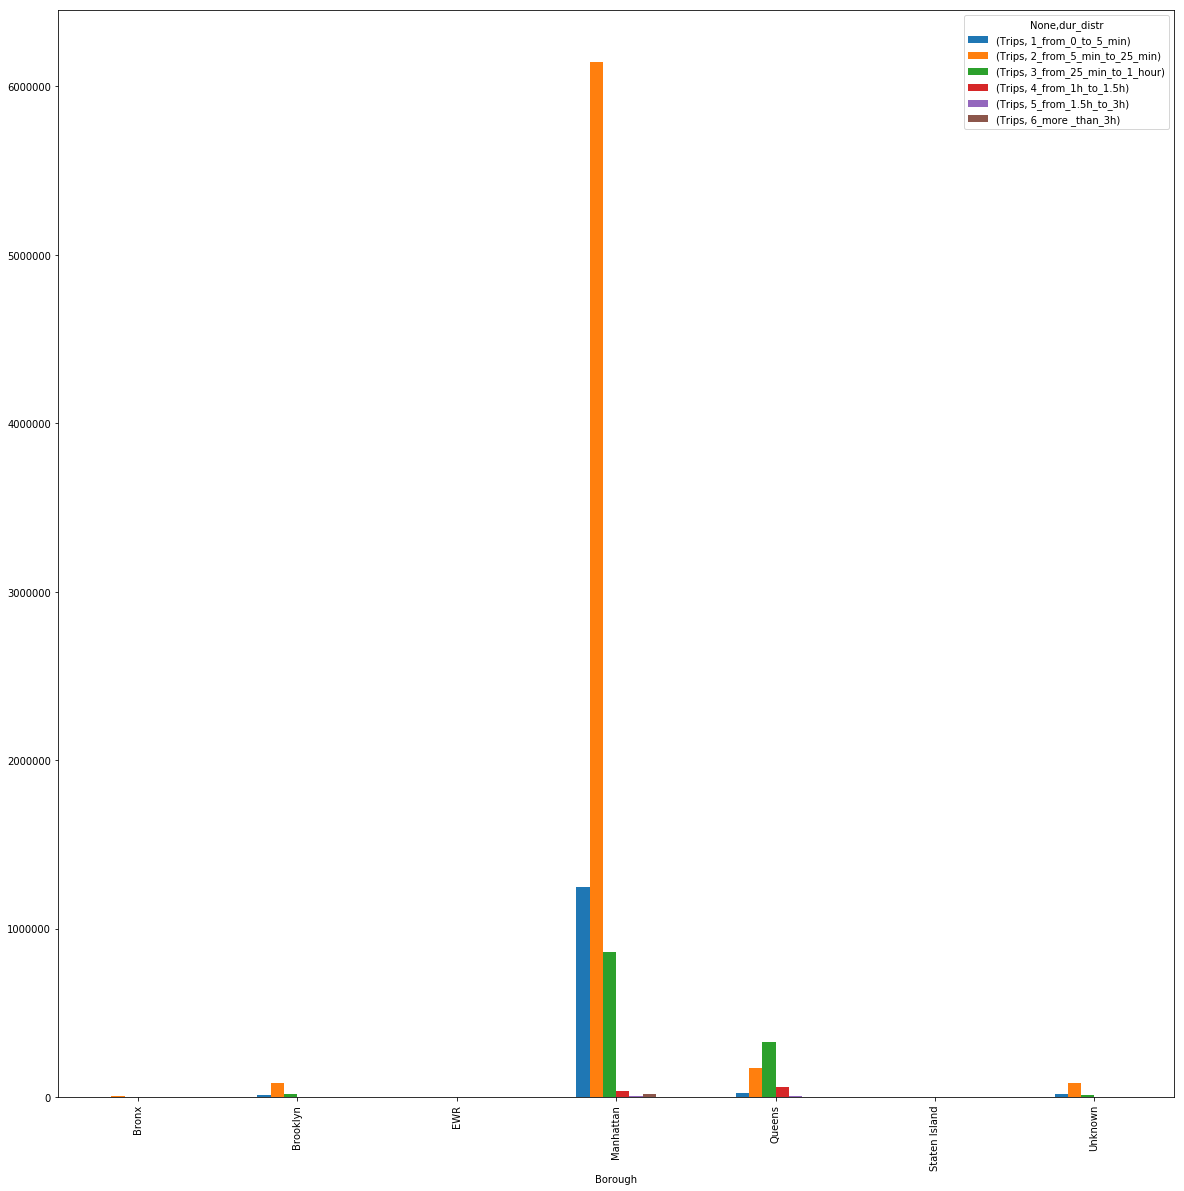

In [21]:
rq03b_05.unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

In [11]:
m06['duration_sec']=[x.days*3600+x.seconds for x in m06['duration']]

In [12]:
m06=m06.drop(m06[m06['duration_sec']==0].index)
m06=m06.drop(m06[m06['trip_distance']<=0].index)

In [13]:
#m06.to_csv("m06_1.csv", encoding='utf-8', index=False)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


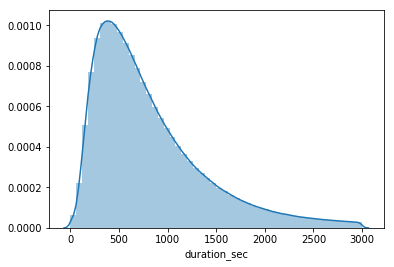

In [14]:
grr=m06[m06['duration_sec']<3001]
grr=grr.drop(grr[grr['duration_sec']<0].index)
sns.distplot(grr['duration_sec'])

In [15]:
m06['dur_distr']=np.where(m06['duration_sec']<=300,"1_from_0_to_5_min",
                         np.where(m06['duration_sec']<=1500,"2_from_5_min_to_25_min",
                                 np.where(m06['duration_sec']<=3600,"3_from_25_min_to_1_hour",
                                         np.where(m06['duration_sec']<=5400,"4_from_1h_to_1.5h",
                                                 np.where(m06['duration_sec']<=10800,"5_from_1.5h_to_3h","6_more _than_3h")))))

In [16]:
rq03_06=pd.DataFrame(m06.groupby(['dur_distr'])['Trips'].sum())

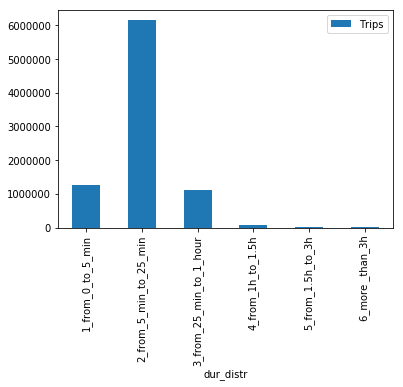

In [17]:
rq03_06.plot.bar()

In [18]:
rq03b_06=pd.DataFrame(m06.groupby(['Borough','dur_distr'])['Trips'].sum())

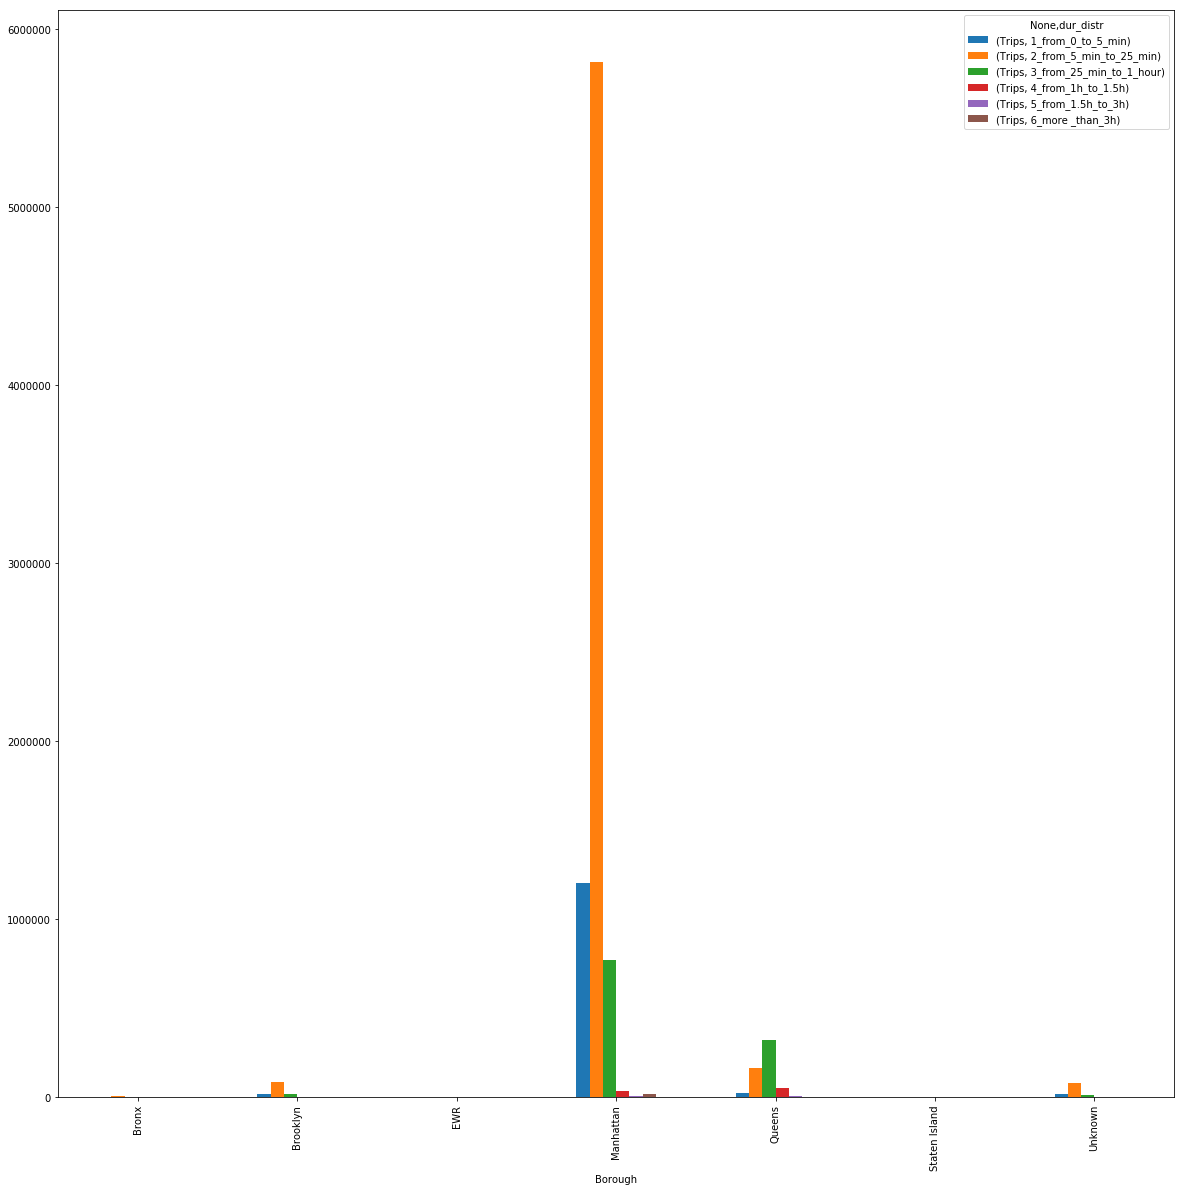

In [19]:
rq03b_06.unstack(level = 1).plot(kind = 'bar', subplots = False, figsize = (20,20))

In [3]:
m01=pd.DataFrame(pd.read_csv("m01_1.csv",usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 
                                                  'fare_amount','duration_sec','Borough','Trips']))

In [4]:
m02=pd.DataFrame(pd.read_csv("m02_1.csv",usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 
                                                  'fare_amount','duration_sec','Borough','Trips']))

In [5]:
m03=pd.DataFrame(pd.read_csv("m03_1.csv",usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 
                                                  'fare_amount','duration_sec','Borough','Trips']))

In [57]:
m04=pd.DataFrame(pd.read_csv("m04_1.csv",usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 
                                                  'fare_amount','duration_sec','Borough','Trips']))

In [69]:
m05=pd.DataFrame(pd.read_csv("m05_1.csv",usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 
                                                  'fare_amount','duration_sec','Borough','Trips']))

In [84]:
m06=pd.DataFrame(pd.read_csv("m06_1.csv",usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID', 'payment_type', 
                                                  'fare_amount','duration_sec','Borough','Trips']))

In [ ]:
## Rq4

In [3]:
rq04_01=pd.DataFrame(m01.groupby(['payment_type','Borough'],as_index=False)['Trips'].sum())

In [4]:
rq04_01

,payment_type,Borough,Trips
0,1,Bronx,2793
1,1,Brooklyn,62652
2,1,EWR,129
3,1,Manhattan,5552784
4,1,Queens,361541
5,1,Staten Island,46
6,1,Unknown,102468
7,2,Bronx,3719
8,2,Brooklyn,34615
9,2,EWR,30


In [ ]:
#1= Credit card
#2= Cash
#3= No charge
#4= Dispute
#5= Unknown
#6= Voided trip

In [5]:
#Rq04_01_1=pd.DataFrame()
l=np.array(rq04_01.iloc[0:7].Trips)
l2=np.array(rq04_01.iloc[7:14].Trips)
l3=np.array(rq04_01.iloc[14:21].Trips)
l4=np.array(rq04_01.iloc[21:28].Trips)
#l5=np.array(rq04_01.iloc[28:35].Trips)
#l6=np.array(rq04_01.iloc[35:42].Trips)
rqq0401=np.vstack((l,l2,l3,l4))
Rq04_01_1=pd.DataFrame(rqq0401,columns=rq04_01.Borough.unique(),index=['Credit card','Cash','No charge','Dispute'])

In [6]:
Rq04_01_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Credit card,2793,62652,129,5552784,361541,46,102468
Cash,3719,34615,30,2342893,148654,59,44868
No charge,121,939,19,30040,3777,5,1164
Dispute,38,269,4,8996,1020,1,298


In [7]:
Rq04_01_1['total_by_type_of_pay'] = Rq04_01_1[Rq04_01_1.columns].sum(axis=1)
Rq04_01_1.loc['Total_by_borough'] = Rq04_01_1.sum()

In [8]:
Rq04_01_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,total_by_type_of_pay
Credit card,2793,62652,129,5552784,361541,46,102468,6082413
Cash,3719,34615,30,2342893,148654,59,44868,2574838
No charge,121,939,19,30040,3777,5,1164,36065
Dispute,38,269,4,8996,1020,1,298,10626
Total_by_borough,6671,98475,182,7934713,514992,111,148798,8703942


In [9]:
chi,p,dof,expected = chi2_contingency(rqq0401, correction = False)

In [12]:
msg = "Test Statistic:{}\np-value: {}\nDegrees of Freedom: {}\n"

print(msg.format(round(chi,2),round(p,2),dof))

Test Statistic:8296.2
p-value: 0.0
Degrees of Freedom: 18



In [13]:
print(expected)

[[4.66177016e+03 6.88154425e+04 1.27183656e+02 5.54486708e+06
  3.59882228e+05 7.75680540e+01 1.03981723e+05]
 [1.97344425e+03 2.91313030e+04 5.38400320e+01 2.34728133e+06
  1.52347175e+05 3.28365030e+01 4.40180719e+04]
 [2.76414543e+01 4.08033610e+02 7.54121523e-01 3.28776805e+04
  2.13388215e+03 4.59931259e-01 6.16548211e+02]
 [8.14413125e+00 1.20220855e+02 2.22190359e-01 9.68690512e+03
  6.28715701e+02 1.35511703e-01 1.81656489e+02]]


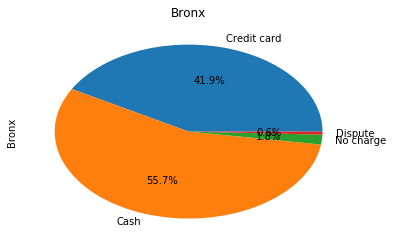

In [14]:
Rq04_01_1.iloc[0:4].plot.pie(y='Bronx', title='Bronx',autopct='%1.1f%%',legend = False)

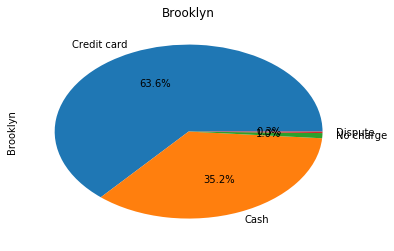

In [15]:
Rq04_01_1.iloc[0:4].plot.pie(y='Brooklyn', title='Brooklyn',autopct='%1.1f%%',legend = False)

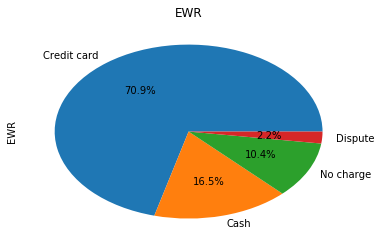

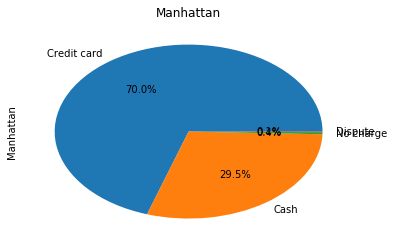

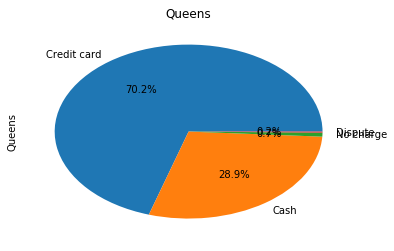

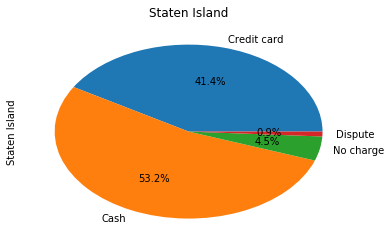

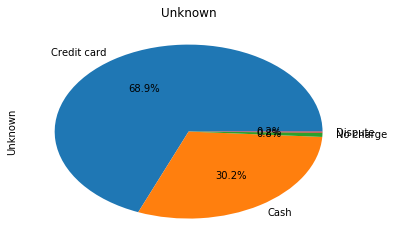

In [16]:
Rq04_01_1.iloc[0:4].plot.pie(y='EWR', title='EWR',autopct='%1.1f%%',legend = False)
Rq04_01_1.iloc[0:4].plot.pie(y='Manhattan', title='Manhattan',autopct='%1.1f%%',legend = False)
Rq04_01_1.iloc[0:4].plot.pie(y='Queens', title='Queens',autopct='%1.1f%%',legend = False)
Rq04_01_1.iloc[0:4].plot.pie(y='Staten Island', title='Staten Island',autopct='%1.1f%%',legend = False)
Rq04_01_1.iloc[0:4].plot.pie(y='Unknown', title='Unknown',autopct='%1.1f%%',legend = False)

In [18]:
rq04_02=pd.DataFrame(m02.groupby(['payment_type','Borough'],as_index=False)['Trips'].sum())

In [19]:
rq04_02

,payment_type,Borough,Trips
0,1,Bronx,2539
1,1,Brooklyn,60415
2,1,EWR,114
3,1,Manhattan,5479851
4,1,Queens,336172
5,1,Staten Island,30
6,1,Unknown,89731
7,2,Bronx,3252
8,2,Brooklyn,31862
9,2,EWR,34


In [23]:
l=np.array(rq04_02.iloc[0:7].Trips)
l2=np.array(rq04_02.iloc[7:14].Trips)
l3=np.array(rq04_02.iloc[14:21].Trips)
l4=np.array(rq04_02.iloc[21:28].Trips)
#l5=np.array(rq04_01.iloc[28:35].Trips)
#l6=np.array(rq04_01.iloc[35:42].Trips)
rqq0402=np.vstack((l,l2,l3,l4))
Rq04_02_1=pd.DataFrame(rqq0402,columns=rq04_02.Borough.unique(),index=['Credit card','Cash','No charge','Dispute'])

In [24]:
Rq04_02_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Credit card,2539,60415,114,5479851,336172,30,89731
Cash,3252,31862,34,2218959,132387,46,37148
No charge,107,858,14,30240,3595,3,1175
Dispute,26,228,1,8954,946,1,265


In [25]:
Rq04_02_1['total_by_type_of_pay'] = Rq04_02_1[Rq04_02_1.columns].sum(axis=1)
Rq04_02_1.loc['Total_by_borough'] = Rq04_02_1.sum()

In [26]:
Rq04_02_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,total_by_type_of_pay
Credit card,2539,60415,114,5479851,336172,30,89731,5968852
Cash,3252,31862,34,2218959,132387,46,37148,2423688
No charge,107,858,14,30240,3595,3,1175,35992
Dispute,26,228,1,8954,946,1,265,10421
Total_by_borough,5924,93363,163,7738004,473100,80,128319,8438953


In [27]:
chi,p,dof,expected = chi2_contingency(rqq0402, correction = False)

In [28]:
msg = "Test Statistic:{}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(round(chi,2),round(p,2),dof))

Test Statistic:7413.57
p-value: 0.0
Degrees of Freedom: 18



In [29]:
print(expected)

[[4.19003154e+03 6.60354346e+04 1.15289524e+02 5.47307239e+06
  3.34622539e+05 5.65838156e+01 9.07597328e+04]
 [1.70138733e+03 2.68140826e+04 4.68139998e+01 2.22237373e+06
  1.35875480e+05 2.29761962e+01 3.68535315e+04]
 [2.52657656e+01 3.98191706e+02 6.95192401e-01 3.30024637e+04
  2.01776396e+03 3.41198725e-01 5.47278489e+02]
 [7.31536294e+00 1.15291058e+02 2.01283619e-01 9.55541993e+03
  5.84216442e+02 9.87895062e-02 1.58457133e+02]]


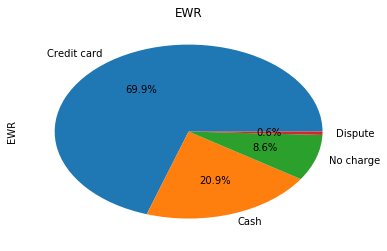

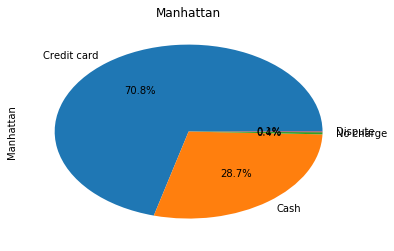

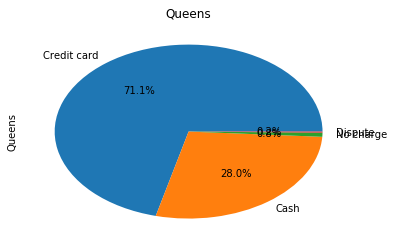

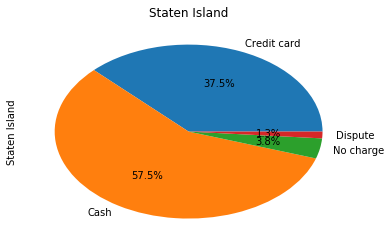

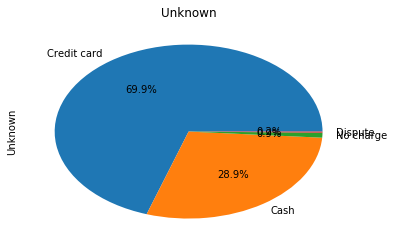

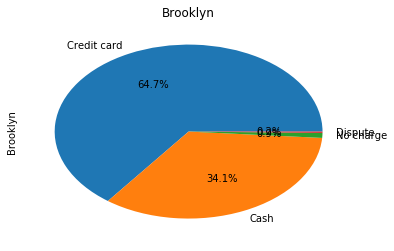

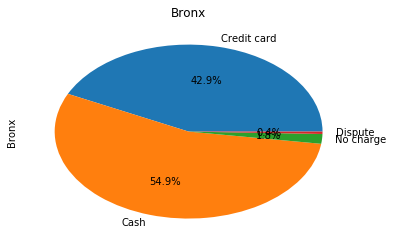

In [30]:
Rq04_02_1.iloc[0:4].plot.pie(y='EWR', title='EWR',autopct='%1.1f%%',legend = False)
Rq04_02_1.iloc[0:4].plot.pie(y='Manhattan', title='Manhattan',autopct='%1.1f%%',legend = False)
Rq04_02_1.iloc[0:4].plot.pie(y='Queens', title='Queens',autopct='%1.1f%%',legend = False)
Rq04_02_1.iloc[0:4].plot.pie(y='Staten Island', title='Staten Island',autopct='%1.1f%%',legend = False)
Rq04_02_1.iloc[0:4].plot.pie(y='Unknown', title='Unknown',autopct='%1.1f%%',legend = False)
Rq04_02_1.iloc[0:4].plot.pie(y='Brooklyn', title='Brooklyn',autopct='%1.1f%%',legend = False)
Rq04_02_1.iloc[0:4].plot.pie(y='Bronx', title='Bronx',autopct='%1.1f%%',legend = False)

In [32]:
rq04_03=pd.DataFrame(m03.groupby(['payment_type','Borough'],as_index=False)['Trips'].sum())

In [33]:
#Rq04_01_1=pd.DataFrame()
l=np.array(rq04_03.iloc[0:7].Trips)
l2=np.array(rq04_03.iloc[7:14].Trips)
l3=np.array(rq04_03.iloc[14:21].Trips)
l4=np.array(rq04_03.iloc[21:28].Trips)
#l5=np.array(rq04_01.iloc[28:35].Trips)
#l6=np.array(rq04_01.iloc[35:42].Trips)
rqq0403=np.vstack((l,l2,l3,l4))
Rq04_03_1=pd.DataFrame(rqq0403,columns=rq04_03.Borough.unique(),index=['Credit card','Cash','No charge','Dispute'])

In [34]:
Rq04_03_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Credit card,4669,79621,493,5977208,386348,73,111654
Cash,5329,41516,114,2538434,170423,51,48537
No charge,267,1480,42,40554,6486,12,2136
Dispute,65,310,10,11231,1523,3,452


In [35]:
Rq04_03_1['total_by_type_of_pay'] = Rq04_03_1[Rq04_03_1.columns].sum(axis=1)
Rq04_03_1.loc['Total_by_borough'] = Rq04_03_1.sum()

In [36]:
Rq04_03_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,total_by_type_of_pay
Credit card,4669,79621,493,5977208,386348,73,111654,6560066
Cash,5329,41516,114,2538434,170423,51,48537,2804404
No charge,267,1480,42,40554,6486,12,2136,50977
Dispute,65,310,10,11231,1523,3,452,13594
Total_by_borough,10330,122927,659,8567427,564780,139,162779,9429041


In [37]:
chi,p,dof,expected = chi2_contingency(rqq0403, correction = False)

In [38]:
msg = "Test Statistic:{}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(round(chi,2),round(p,2),dof))

Test Statistic:13979.27
p-value: 0.0
Degrees of Freedom: 18



In [39]:
print(expected)

[[7.18689014e+03 8.55239927e+04 4.58486021e+02 5.96061536e+06
  3.92934348e+05 9.67064598e+01 1.13250222e+05]
 [3.07236901e+03 3.65611912e+04 1.96001082e+02 2.54814106e+06
  1.67977983e+05 4.13416546e+01 4.84140517e+04]
 [5.58479288e+01 6.64590352e+02 3.56280591e+00 4.63187854e+04
  3.05341657e+03 7.51487134e-01 8.80045498e+02]
 [1.48929271e+01 1.77225832e+02 9.50090895e-01 1.23517972e+04
  8.14252406e+02 2.00398535e-01 2.34681101e+02]]


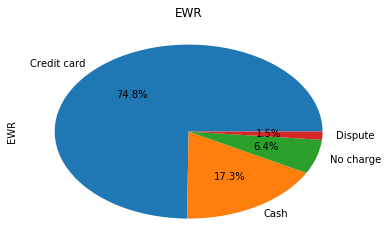

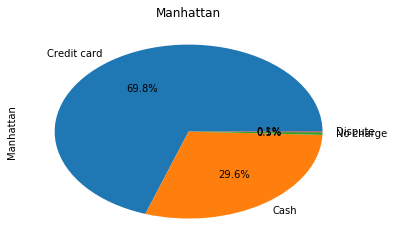

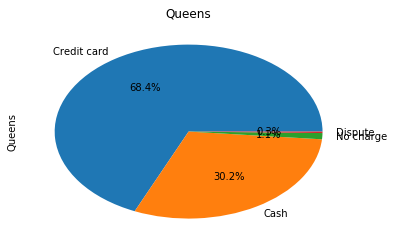

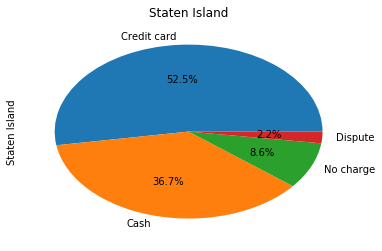

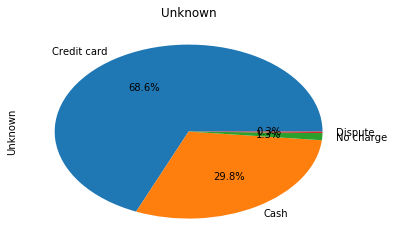

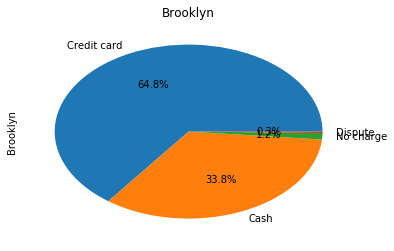

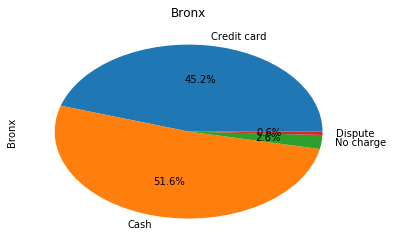

In [40]:
Rq04_03_1.iloc[0:4].plot.pie(y='EWR', title='EWR',autopct='%1.1f%%',legend = False)
Rq04_03_1.iloc[0:4].plot.pie(y='Manhattan', title='Manhattan',autopct='%1.1f%%',legend = False)
Rq04_03_1.iloc[0:4].plot.pie(y='Queens', title='Queens',autopct='%1.1f%%',legend = False)
Rq04_03_1.iloc[0:4].plot.pie(y='Staten Island', title='Staten Island',autopct='%1.1f%%',legend = False)
Rq04_03_1.iloc[0:4].plot.pie(y='Unknown', title='Unknown',autopct='%1.1f%%',legend = False)
Rq04_03_1.iloc[0:4].plot.pie(y='Brooklyn', title='Brooklyn',autopct='%1.1f%%',legend = False)
Rq04_03_1.iloc[0:4].plot.pie(y='Bronx', title='Bronx',autopct='%1.1f%%',legend = False)

In [42]:
rq04_04=pd.DataFrame(m04.groupby(['payment_type','Borough'],as_index=False)['Trips'].sum())

In [44]:
rq04_04

,payment_type,Borough,Trips
0,1,Bronx,5291
1,1,Brooklyn,76658
2,1,EWR,150
3,1,Manhattan,5857626
4,1,Queens,408343
5,1,Staten Island,49
6,1,Unknown,96323
7,2,Bronx,4387
8,2,Brooklyn,38998
9,2,EWR,28


In [45]:
l4=np.array(rq04_04.iloc[21:28].Trips)

In [47]:
l4=[36,  281,    3, 9578, 1284,0,  390]

In [48]:
#Rq04_01_1=pd.DataFrame()
l=np.array(rq04_04.iloc[0:7].Trips)
l2=np.array(rq04_04.iloc[7:14].Trips)
l3=np.array(rq04_04.iloc[14:21].Trips)
#l4=np.array(rq04_04.iloc[21:28].Trips)
#l5=np.array(rq04_01.iloc[28:35].Trips)
#l6=np.array(rq04_01.iloc[35:42].Trips)
rqq0404=np.vstack((l,l2,l3,l4))
Rq04_04_1=pd.DataFrame(rqq0404,columns=rq04_04.Borough.unique(),index=['Credit card','Cash','No charge','Dispute'])

In [49]:
Rq04_04_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Credit card,5291,76658,150,5857626,408343,49,96323
Cash,4387,38998,28,2493844,168773,41,41419
No charge,166,1090,17,36107,4727,4,1399
Dispute,36,281,3,9578,1284,0,390


In [59]:
Rq04_04_1['total_by_type_of_pay'] = Rq04_04_1[Rq04_04_1.columns].sum(axis=1)
Rq04_04_1.loc['Total_by_borough'] = Rq04_04_1.sum()

In [60]:
Rq04_04_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,total_by_type_of_pay
Credit card,5291,76658,150,5857626,408343,49,96323,6444440
Cash,4387,38998,28,2493844,168773,41,41419,2747490
No charge,166,1090,17,36107,4727,4,1399,43510
Dispute,36,281,3,9578,1284,0,390,11572
Total_by_borough,9880,117027,198,8397155,583127,94,139531,9247012


In [72]:
chi,p,dof,expected = chi2_contingency(rqq0404, correction = False)
msg = "Test Statistic:{}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(round(chi,2),round(p,2),dof))

Test Statistic:6738.74
p-value: 0.0
Degrees of Freedom: 18



In [73]:
print(expected)

[[6.88558285e+03 8.15586137e+04 1.37990425e+02 5.85215652e+06
  4.06393651e+05 6.55106060e+01 9.72421316e+04]
 [2.93556461e+03 3.47712874e+04 5.88301410e+01 2.49497885e+06
  1.73259816e+05 2.79294609e+01 4.14577192e+04]
 [4.64884008e+01 5.50647579e+02 9.31650137e-01 3.95111647e+04
  2.74378964e+03 4.42298550e-01 6.56535734e+02]
 [1.23641410e+01 1.46451248e+02 2.47783392e-01 1.05084624e+04
  7.29743364e+02 1.17634540e-01 1.74613457e+02]]


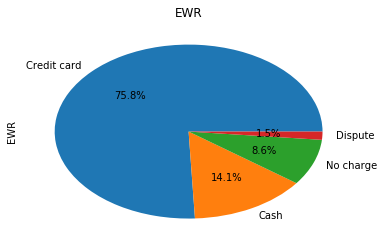

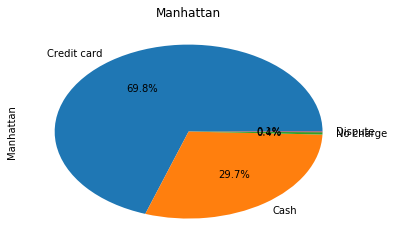

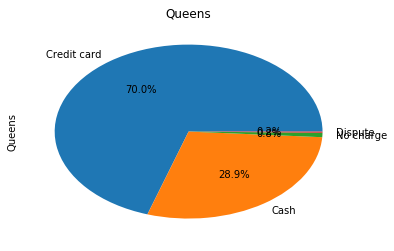

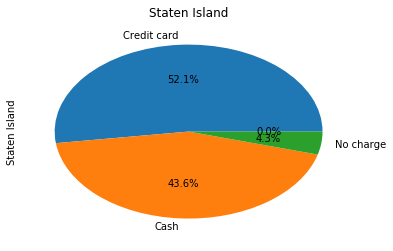

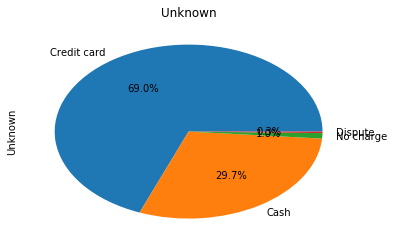

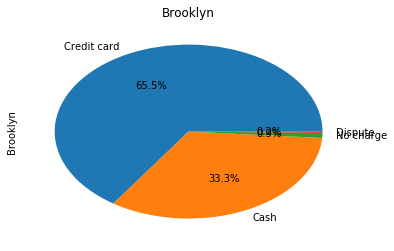

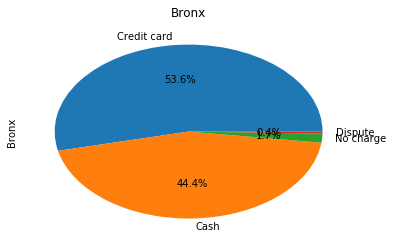

In [74]:
Rq04_04_1.iloc[0:4].plot.pie(y='EWR', title='EWR',autopct='%1.1f%%',legend = False)
Rq04_04_1.iloc[0:4].plot.pie(y='Manhattan', title='Manhattan',autopct='%1.1f%%',legend = False)
Rq04_04_1.iloc[0:4].plot.pie(y='Queens', title='Queens',autopct='%1.1f%%',legend = False)
Rq04_04_1.iloc[0:4].plot.pie(y='Staten Island', title='Staten Island',autopct='%1.1f%%',legend = False)
Rq04_04_1.iloc[0:4].plot.pie(y='Unknown', title='Unknown',autopct='%1.1f%%',legend = False)
Rq04_04_1.iloc[0:4].plot.pie(y='Brooklyn', title='Brooklyn',autopct='%1.1f%%',legend = False)
Rq04_04_1.iloc[0:4].plot.pie(y='Bronx', title='Bronx',autopct='%1.1f%%',legend = False)

In [55]:
rq04_05=pd.DataFrame(m05.groupby(['payment_type','Borough'],as_index=False)['Trips'].sum())

In [56]:
#Rq04_01_1=pd.DataFrame()
l=np.array(rq04_05.iloc[0:7].Trips)
l2=np.array(rq04_05.iloc[7:14].Trips)
l3=np.array(rq04_05.iloc[14:21].Trips)
l4=np.array(rq04_05.iloc[21:28].Trips)
#l5=np.array(rq04_01.iloc[28:35].Trips)
#l6=np.array(rq04_01.iloc[35:42].Trips)
rqq0405=np.vstack((l,l2,l3,l4))
Rq04_05_1=pd.DataFrame(rqq0405,columns=rq04_05.Borough.unique(),index=['Credit card','Cash','No charge','Dispute'])

In [57]:
Rq04_05_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
Credit card,6042,79519,182,5785922,411671,68,81184
Cash,4039,39820,37,2486049,179303,47,35400
No charge,145,1096,19,35277,4859,2,1253
Dispute,37,260,2,10327,1371,3,231


In [58]:
Rq04_05_1['total_by_type_of_pay'] = Rq04_05_1[Rq04_05_1.columns].sum(axis=1)
Rq04_05_1.loc['Total_by_borough'] = Rq04_05_1.sum()

In [61]:
Rq04_05_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,total_by_type_of_pay
Credit card,6042,79519,182,5785922,411671,68,81184,6364588
Cash,4039,39820,37,2486049,179303,47,35400,2744695
No charge,145,1096,19,35277,4859,2,1253,42651
Dispute,37,260,2,10327,1371,3,231,12231
Total_by_borough,10263,120695,240,8317575,597204,120,118068,9164165


In [71]:
chi,p,dof,expected = chi2_contingency(rqq0405, correction = False)
msg = "Test Statistic:{}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(round(chi,2),round(p,2),dof))

Test Statistic:5562.91
p-value: 0.0
Degrees of Freedom: 18



In [63]:
print(expected)

[[7.18689014e+03 8.55239927e+04 4.58486021e+02 5.96061536e+06
  3.92934348e+05 9.67064598e+01 1.13250222e+05]
 [3.07236901e+03 3.65611912e+04 1.96001082e+02 2.54814106e+06
  1.67977983e+05 4.13416546e+01 4.84140517e+04]
 [5.58479288e+01 6.64590352e+02 3.56280591e+00 4.63187854e+04
  3.05341657e+03 7.51487134e-01 8.80045498e+02]
 [1.48929271e+01 1.77225832e+02 9.50090895e-01 1.23517972e+04
  8.14252406e+02 2.00398535e-01 2.34681101e+02]]


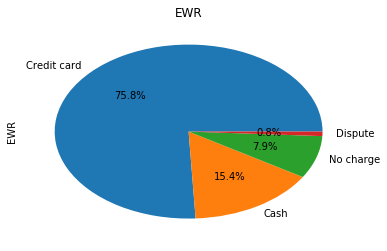

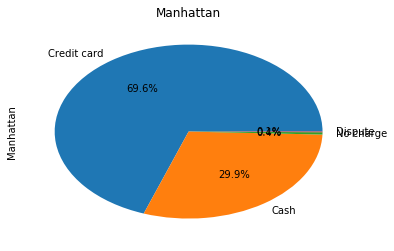

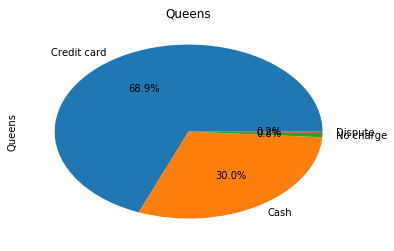

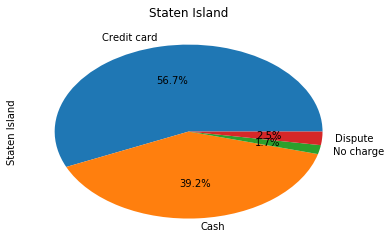

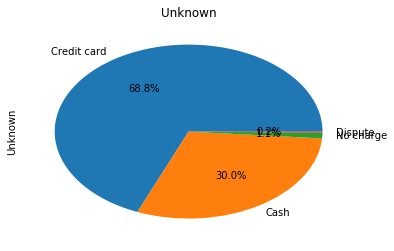

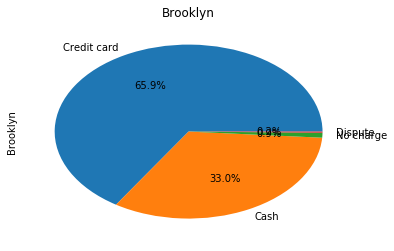

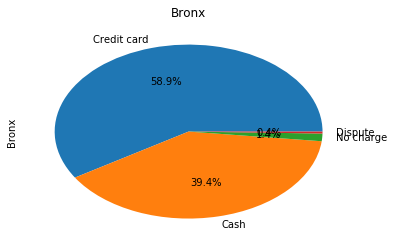

In [79]:
Rq04_05_1.iloc[0:4].plot.pie(y='EWR', title='EWR',autopct='%1.1f%%',legend = False)
Rq04_05_1.iloc[0:4].plot.pie(y='Manhattan', title='Manhattan',autopct='%1.1f%%',legend = False)
Rq04_05_1.iloc[0:4].plot.pie(y='Queens', title='Queens',autopct='%1.1f%%',legend = False)
Rq04_05_1.iloc[0:4].plot.pie(y='Staten Island', title='Staten Island',autopct='%1.1f%%',legend = False)
Rq04_05_1.iloc[0:4].plot.pie(y='Unknown', title='Unknown',autopct='%1.1f%%',legend = False)
Rq04_05_1.iloc[0:4].plot.pie(y='Brooklyn', title='Brooklyn',autopct='%1.1f%%',legend = False)
Rq04_05_1.iloc[0:4].plot.pie(y='Bronx', title='Bronx',autopct='%1.1f%%',legend = False)

In [66]:
rq04_06=pd.DataFrame(m06.groupby(['payment_type','Borough'],as_index=False)['Trips'].sum())

In [67]:
#Rq04_01_1=pd.DataFrame()
l=np.array(rq04_06.iloc[0:7].Trips)
l2=np.array(rq04_06.iloc[7:14].Trips)
l3=np.array(rq04_06.iloc[14:21].Trips)
l4=np.array(rq04_06.iloc[21:28].Trips)
#l5=np.array(rq04_01.iloc[28:35].Trips)
#l6=np.array(rq04_01.iloc[35:42].Trips)
rqq0406=np.vstack((l,l2,l3,l4))
Rq04_06_1=pd.DataFrame(rqq0406,columns=rq04_06.Borough.unique(),index=['Credit card','Cash','No charge','Dispute'])

In [68]:
Rq04_06_1['total_by_type_of_pay'] = Rq04_06_1[Rq04_06_1.columns].sum(axis=1)
Rq04_06_1.loc['Total_by_borough'] = Rq04_06_1.sum()

In [69]:
Rq04_06_1

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown,total_by_type_of_pay
Credit card,5612,79324,159,5473828,385797,72,80233,6025025
Cash,3841,40093,34,2329127,168225,43,34437,2575800
No charge,128,1171,7,32963,4478,8,1202,39957
Dispute,40,317,1,10356,1252,3,184,12153
Total_by_borough,9621,120905,201,7846274,559752,126,116056,8652935


In [76]:
chi,p,dof,expected = chi2_contingency(rqq0406, correction = False)
msg = "Test Statistic:{}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(round(chi,2),round(p,2),dof))

Test Statistic:5392.32
p-value: 0.0
Degrees of Freedom: 18



In [77]:
print(expected)

[[6.69908713e+03 8.41859609e+04 1.39955983e+02 5.46334822e+06
  3.89754435e+05 8.77336014e+01 8.08096098e+04]
 [2.86397295e+03 3.59909209e+04 5.98335478e+01 2.33567368e+06
  1.66626607e+05 3.75075971e+01 3.45474738e+04]
 [4.44272720e+01 5.58307798e+02 9.28165646e-01 3.62320496e+04
  2.58478894e+03 5.81835181e-01 5.35916379e+02]
 [1.35126420e+01 1.69810413e+02 2.82303403e-01 1.10200490e+04
  7.86168630e+02 1.76966313e-01 1.63000019e+02]]


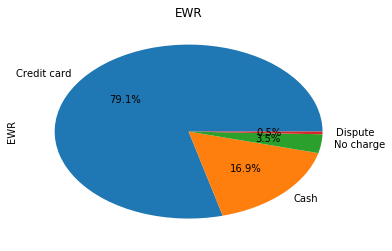

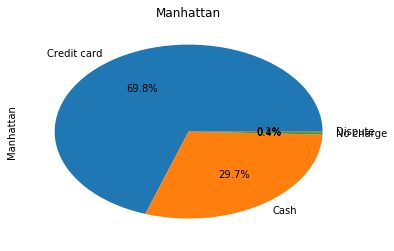

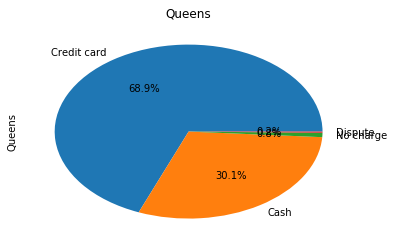

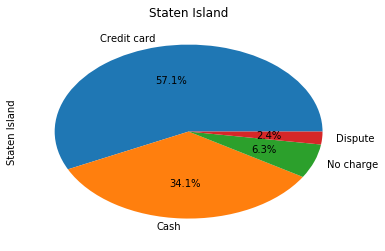

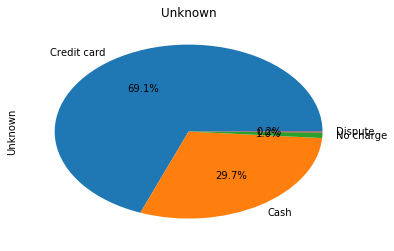

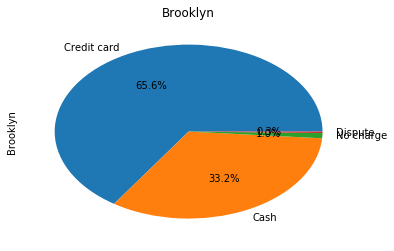

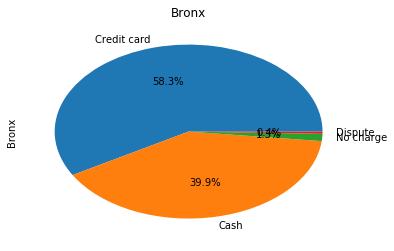

In [78]:
Rq04_06_1.iloc[0:4].plot.pie(y='EWR', title='EWR',autopct='%1.1f%%',legend = False)
Rq04_06_1.iloc[0:4].plot.pie(y='Manhattan', title='Manhattan',autopct='%1.1f%%',legend = False)
Rq04_06_1.iloc[0:4].plot.pie(y='Queens', title='Queens',autopct='%1.1f%%',legend = False)
Rq04_06_1.iloc[0:4].plot.pie(y='Staten Island', title='Staten Island',autopct='%1.1f%%',legend = False)
Rq04_06_1.iloc[0:4].plot.pie(y='Unknown', title='Unknown',autopct='%1.1f%%',legend = False)
Rq04_06_1.iloc[0:4].plot.pie(y='Brooklyn', title='Brooklyn',autopct='%1.1f%%',legend = False)
Rq04_06_1.iloc[0:4].plot.pie(y='Bronx', title='Bronx',autopct='%1.1f%%',legend = False)

In [ ]:
## RQ5

In [80]:
test=m01[(m01['trip_distance']>=4) & (m01['duration_sec']>360)]

In [82]:
stats.pearsonr(test['duration_sec'],test['trip_distance'] )

(0.12227803692808095, 0.0)

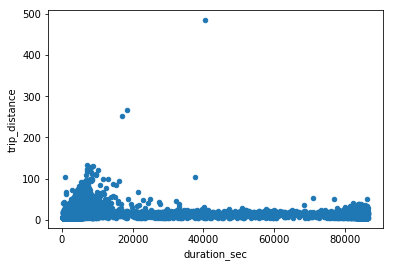

In [83]:
test.plot.scatter(y='trip_distance', x='duration_sec')

In [84]:
test=m02[(m02['trip_distance']>=4) & (m02['duration_sec']>360)]
stats.pearsonr(test['duration_sec'],test['trip_distance'] )

(0.11431873117864208, 0.0)

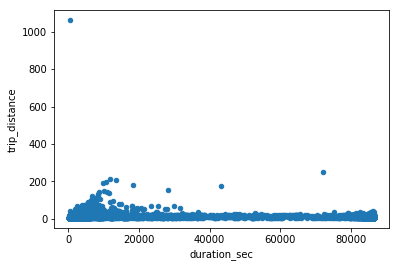

In [85]:
test.plot.scatter(y='trip_distance', x='duration_sec')

In [86]:
test=m03[(m03['trip_distance']>=4) & (m03['duration_sec']>360)]
stats.pearsonr(test['duration_sec'],test['trip_distance'] )

(0.1288862380895024, 0.0)

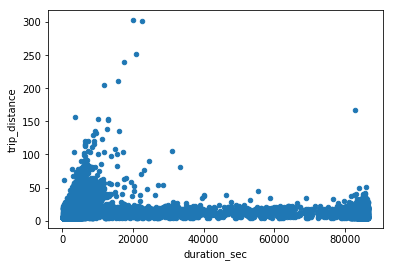

In [87]:
test.plot.scatter(y='trip_distance', x='duration_sec')

In [88]:
test=m04[(m04['trip_distance']>=4) & (m04['duration_sec']>360)]
stats.pearsonr(test['duration_sec'],test['trip_distance'] )

(0.12888286168423044, 0.0)

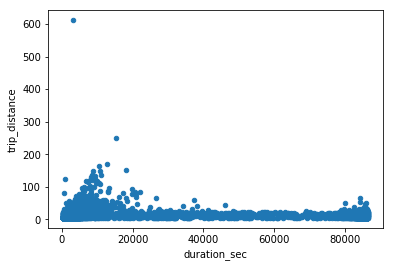

In [89]:
test.plot.scatter(y='trip_distance', x='duration_sec')

In [90]:
test=m05[(m05['trip_distance']>=4) & (m05['duration_sec']>360)]
stats.pearsonr(test['duration_sec'],test['trip_distance'] )

(0.13951023472250734, 0.0)

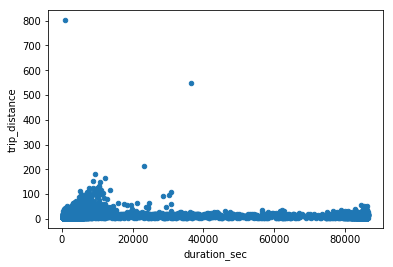

In [91]:
test.plot.scatter(y='trip_distance', x='duration_sec')

In [92]:
test=m06[(m06['trip_distance']>=4) & (m06['duration_sec']>360)]
stats.pearsonr(test['duration_sec'],test['trip_distance'] )

(0.13578552855246503, 0.0)

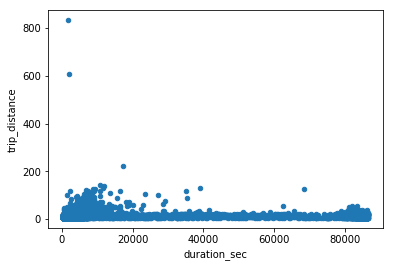

In [93]:
test.plot.scatter(y='trip_distance', x='duration_sec')

## CR1

In [94]:
m01_1=m01.drop(m01[m01['fare_amount']<=0].index)

In [95]:
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)

In [96]:
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])

In [97]:
cr01b_01=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].mean())

In [98]:
cr01b_01b=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].std())

In [99]:
cr01b_01=cr01b_01.merge(cr01b_01b,left_on='Borough', right_on='Borough', how='inner')

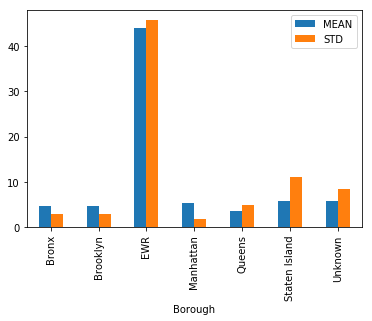

In [100]:
cr01b_01.columns=['MEAN', 'STD']
cr01b_01.plot.bar()

In [101]:
mpl=m01_1[m01_1['Price_per_mile']<20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


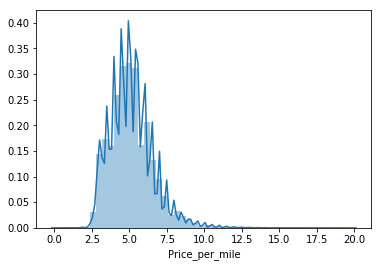

In [102]:
sns.distplot(mpl['Price_per_mile'])

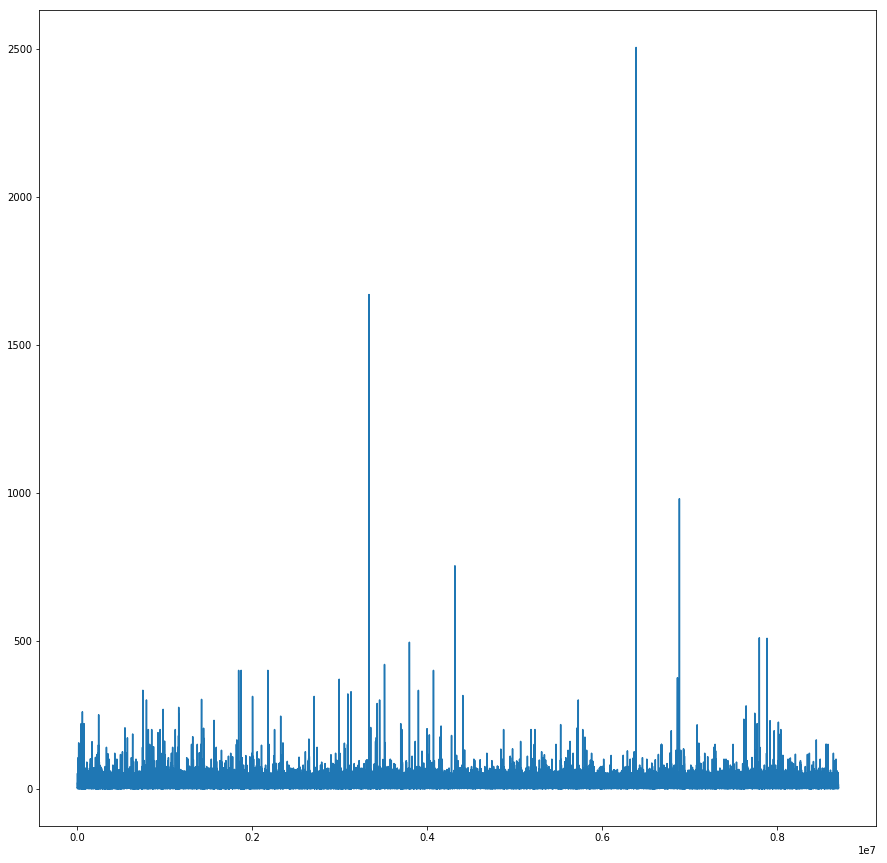

In [116]:
m01_1['Price_per_mile'].plot(figsize=(15,15))

In [103]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['Price_per_mile'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['Price_per_mile'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['Price_per_mile'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['Price_per_mile'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['Price_per_mile'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['Price_per_mile'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['Price_per_mile'])
Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']

In [104]:
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-3.018136140476204, pvalue=0.0025439559580736656)


Brooklyn EWR
Ttest_indResult(statistic=-149.14826773716865, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-149.14826773716865, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=65.90655391179246, pvalue=0.0)


Brooklyn Staten
Ttest_indResult(statistic=-4.040891060190151, pvalue=5.328888021031541e-05)


Brooklyn Unknown
Ttest_indResult(statistic=-39.78534683418207, pvalue=0.0)


Bronx EWR
Ttest_indResult(statistic=-65.41334248135398, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-65.41334248135398, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=19.45764237041924, pvalue=2.690362513528966e-84)


Bronx Staten
Ttest_indResult(statistic=-3.285794596143215, pvalue=0.001022136489986511)


Bronx Unknown
Ttest_indResult(statistic=-9.652491010946497, pvalue=4.866561079999762e-22)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.0)


EWR Queens
Ttest_indResult(sta

In [106]:
m01_1['price_weighted'] = m01_1['Price_per_mile'] / m01_1['duration_sec']

In [109]:
w1=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].mean())

In [110]:
w2=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].std())

In [111]:
w2.columns = ['std']
w1.columns= ['mean']
wei= w1.join(w2)

In [112]:
wei

,mean,std
Borough,,
Bronx,0.030108,0.414574
Brooklyn,0.021174,0.489331
EWR,4.745733,11.021163
Manhattan,0.012808,0.137979
Queens,0.018551,0.490243
Staten Island,0.079920,0.358079
Unknown,0.128409,1.947977


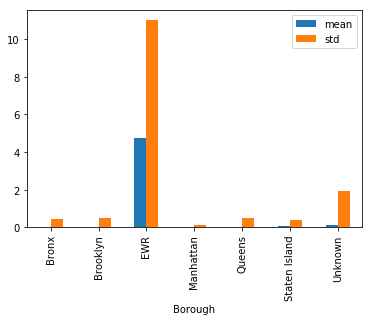

In [113]:
wei.plot.bar()

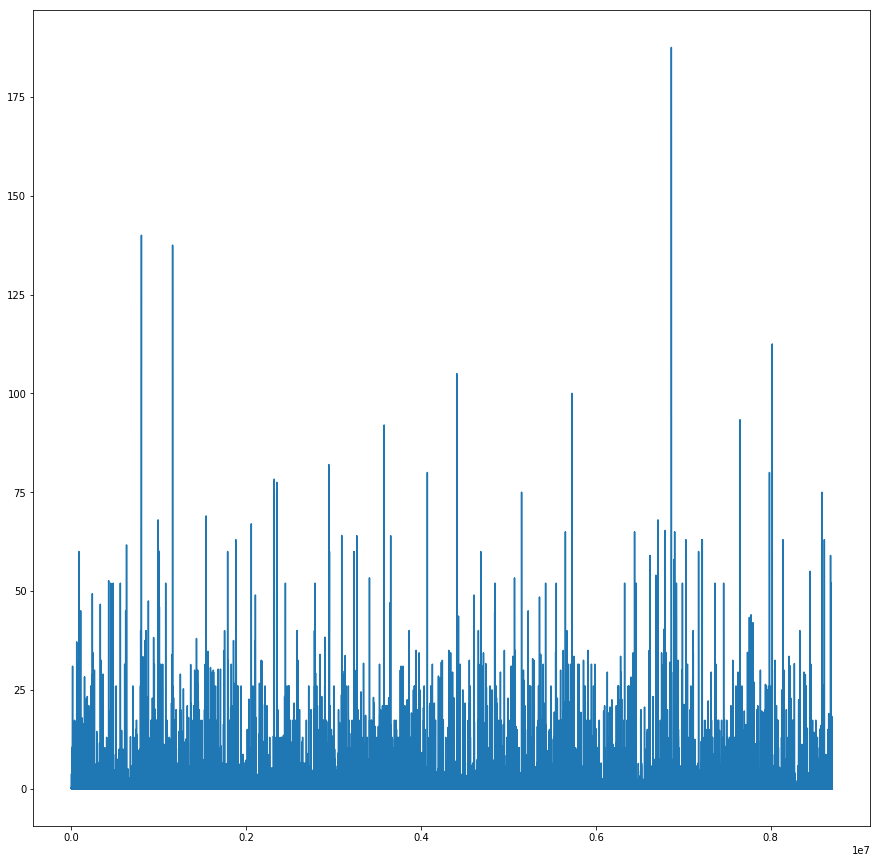

In [114]:
m01_1['price_weighted'].plot(figsize=(15,15))

In [115]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['price_weighted'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['price_weighted'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['price_weighted'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['price_weighted'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['price_weighted'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['price_weighted'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['price_weighted'])

Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
from scipy.stats import ttest_ind
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-1.4542007777424097, pvalue=0.14589363858827756)


Brooklyn EWR
Ttest_indResult(statistic=-91.57908411814645, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-91.57908411814645, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=1.5376917281969062, pvalue=0.1241245234904775)


Brooklyn Staten
Ttest_indResult(statistic=-1.247266160671417, pvalue=0.21230288781823023)


Brooklyn Unknown
Ttest_indResult(statistic=-16.914012759714378, pvalue=3.855534929689579e-64)


Bronx EWR
Ttest_indResult(statistic=-34.04263527400567, pvalue=9.831338072028458e-235)


Bronx Manhattan
Ttest_indResult(statistic=-34.04263527400567, pvalue=9.831338072028458e-235)


Bronx Queens
Ttest_indResult(statistic=1.9137920174855423, pvalue=0.055647283173407946)


Bronx Staten
Ttest_indResult(statistic=-1.2411276310647605, pvalue=0.21460168943051836)


Bronx Unknown
Ttest_indResult(statistic=-4.111237172084889, pvalue=3.937467949225062e-05)


EWR Manhattan
Ttest_i

In [ ]:
#feb

In [6]:
m01_1=m02.drop(m02[m02['fare_amount']<=0].index)
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)

In [7]:
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])

In [8]:
cr01b_01=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].mean())

In [9]:
cr01b_01b=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].std())

In [10]:
cr01b_01=cr01b_01.merge(cr01b_01b,left_on='Borough', right_on='Borough', how='inner')

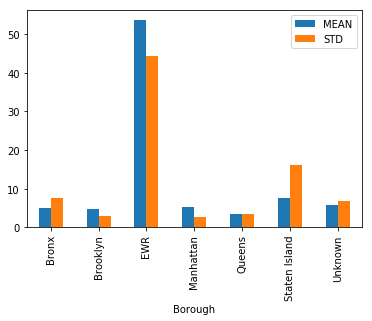

In [11]:
cr01b_01.columns=['MEAN', 'STD']
cr01b_01.plot.bar()

In [12]:
mpl=m01_1[m01_1['Price_per_mile']<20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


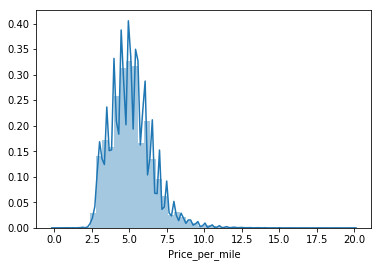

In [13]:
sns.distplot(mpl['Price_per_mile'])

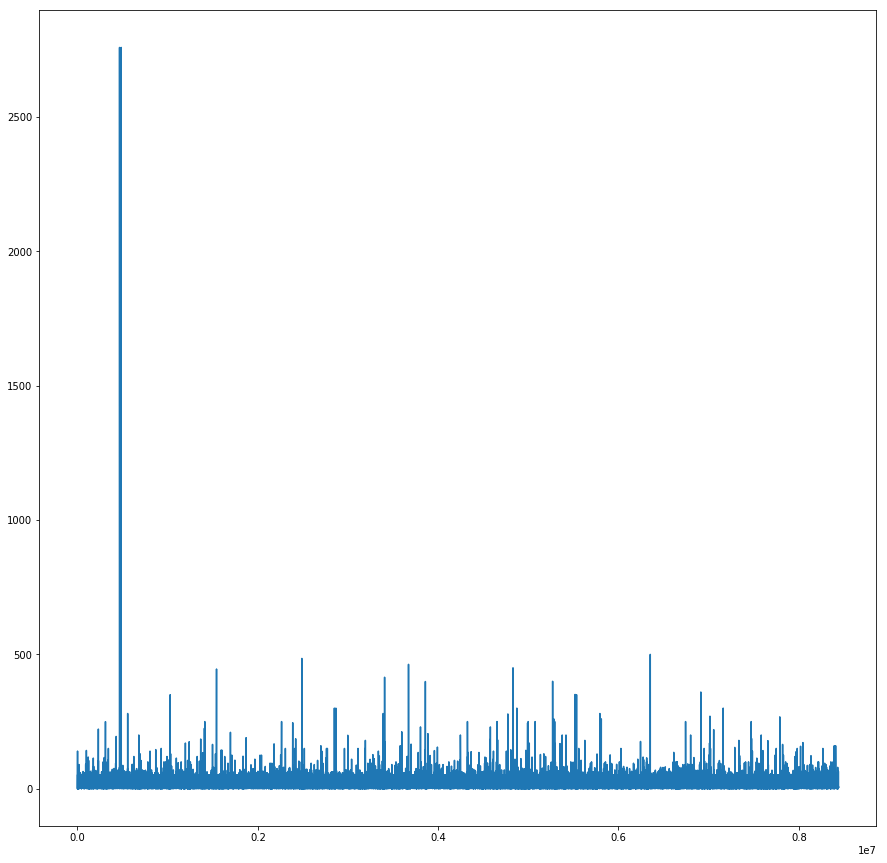

In [14]:
m01_1['Price_per_mile'].plot(figsize=(15,15))

In [15]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['Price_per_mile'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['Price_per_mile'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['Price_per_mile'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['Price_per_mile'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['Price_per_mile'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['Price_per_mile'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['Price_per_mile'])
Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']

In [16]:
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-5.583835382503805, pvalue=2.3588531438880155e-08)


Brooklyn EWR
Ttest_indResult(statistic=-172.05590602383873, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-172.05590602383873, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=90.10198869014745, pvalue=0.0)


Brooklyn Staten
Ttest_indResult(statistic=-8.8502883993759, pvalue=8.87762150321956e-19)


Brooklyn Unknown
Ttest_indResult(statistic=-47.25436130275904, pvalue=0.0)


Bronx EWR
Ttest_indResult(statistic=-57.954272569404786, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-57.954272569404786, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=29.341468825798966, pvalue=4.524063690618873e-189)


Bronx Staten
Ttest_indResult(statistic=-3.1744577721746947, pvalue=0.0015087785844249068)


Bronx Unknown
Ttest_indResult(statistic=-9.543225194741765, pvalue=1.4066349629997953e-21)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.0)


EWR Queens
Ttest_indResul

In [17]:
m01_1['price_weighted'] = m01_1['Price_per_mile'] / m01_1['duration_sec']
w1=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].mean())
w2=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].std())
w2.columns = ['std']
w1.columns= ['mean']
wei= w1.join(w2)

In [18]:
wei

,mean,std
Borough,,
Bronx,0.044159,0.930179
Brooklyn,0.016395,0.351640
EWR,3.994117,7.464959
Manhattan,0.012826,0.334821
Queens,0.017421,0.419005
Staten Island,0.519533,3.154624
Unknown,0.121018,1.752417


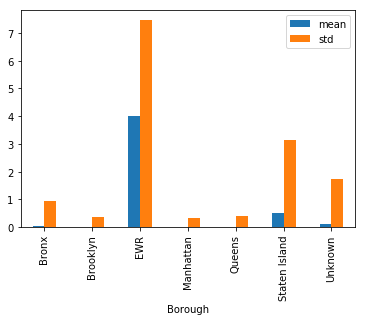

In [19]:
wei.plot.bar()

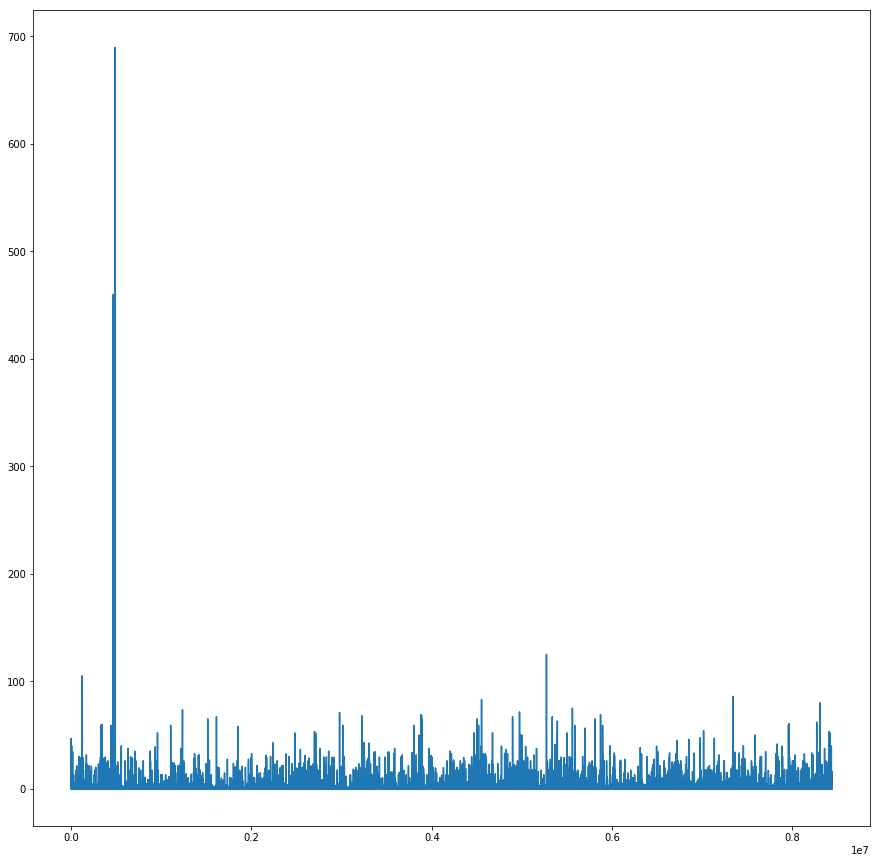

In [20]:
m01_1['price_weighted'].plot(figsize=(15,15))

In [21]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['price_weighted'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['price_weighted'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['price_weighted'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['price_weighted'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['price_weighted'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['price_weighted'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['price_weighted'])

Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
from scipy.stats import ttest_ind
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-5.0509224215633415, pvalue=4.40459478176066e-07)


Brooklyn EWR
Ttest_indResult(statistic=-105.22144236727065, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-105.22144236727065, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=-0.7003972818117524, pvalue=0.48367952130637215)


Brooklyn Staten
Ttest_indResult(statistic=-12.309806072146882, pvalue=8.536824596497742e-35)


Brooklyn Unknown
Ttest_indResult(statistic=-17.969087292155006, pvalue=3.830221660752138e-72)


Bronx EWR
Ttest_indResult(statistic=-32.01535993852933, pvalue=6.5416335066027475e-208)


Bronx Manhattan
Ttest_indResult(statistic=-32.01535993852933, pvalue=6.5416335066027475e-208)


Bronx Queens
Ttest_indResult(statistic=4.759718772291322, pvalue=1.9391939651746913e-06)


Bronx Staten
Ttest_indResult(statistic=-4.2318816520127, pvalue=2.3520923194240027e-05)


Bronx Unknown
Ttest_indResult(statistic=-3.3488808861838746, pvalue=0.0008116101880282488)


EWR Manha

In [ ]:
#mar

In [43]:
m01_1=m03.drop(m03[m03['fare_amount']<=0].index)
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)

In [45]:
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])
cr01b_01=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].mean())
cr01b_01b=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].std())

In [46]:
cr01b_01=cr01b_01.merge(cr01b_01b,left_on='Borough', right_on='Borough', how='inner')

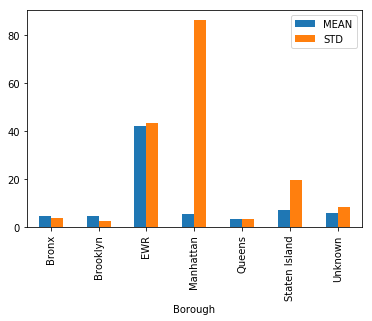

In [47]:
cr01b_01.columns=['MEAN', 'STD']
cr01b_01.plot.bar()

In [48]:
mpl=m01_1[m01_1['Price_per_mile']<20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


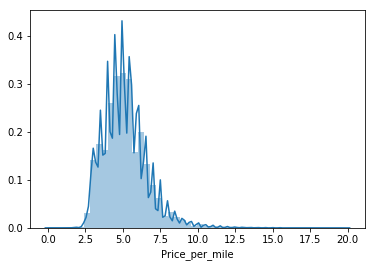

In [49]:
sns.distplot(mpl['Price_per_mile'])

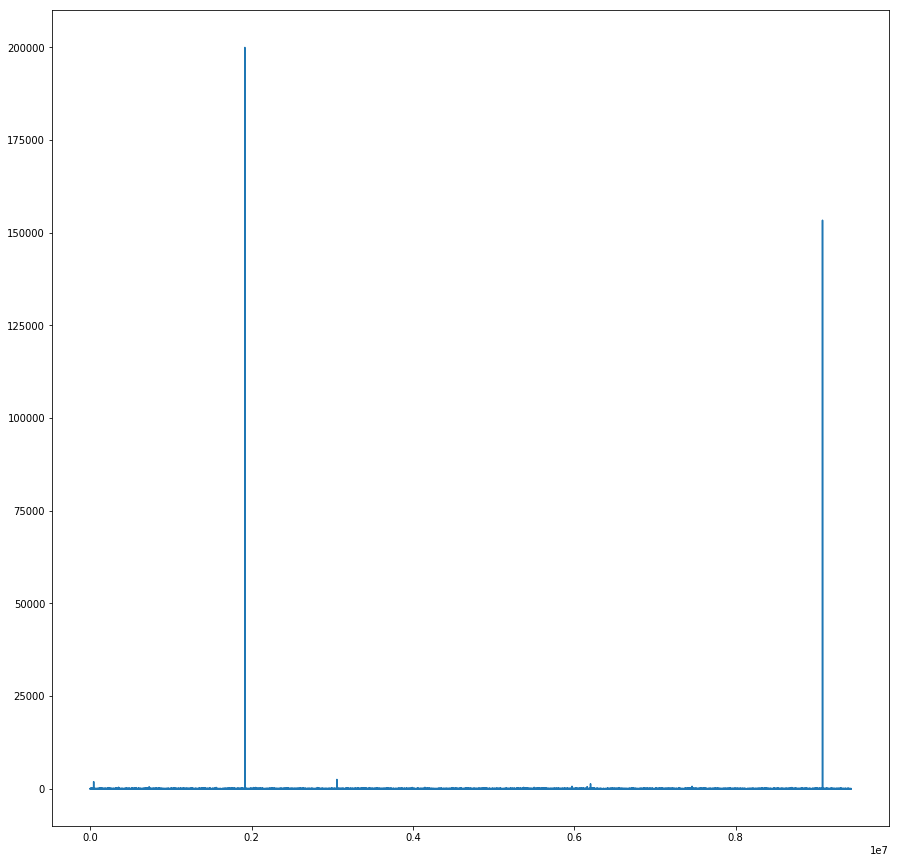

In [50]:
m01_1['Price_per_mile'].plot(figsize=(15,15))

In [51]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['Price_per_mile'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['Price_per_mile'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['Price_per_mile'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['Price_per_mile'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['Price_per_mile'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['Price_per_mile'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['Price_per_mile'])
Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']

In [52]:
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-2.462280515930463, pvalue=0.01380694842950265)


Brooklyn EWR
Ttest_indResult(statistic=-169.17940619339763, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-169.17940619339763, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=97.17430679882891, pvalue=0.0)


Brooklyn Staten
Ttest_indResult(statistic=-9.756835326283245, pvalue=1.757847295074441e-22)


Brooklyn Unknown
Ttest_indResult(statistic=-47.87027009776307, pvalue=0.0)


Bronx EWR
Ttest_indResult(statistic=-71.30422630030661, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-71.30422630030661, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=30.34588286652431, pvalue=4.159329744019042e-202)


Bronx Staten
Ttest_indResult(statistic=-5.561338978357383, pvalue=2.7478393165548873e-08)


Bronx Unknown
Ttest_indResult(statistic=-13.110898958426306, pvalue=2.9873926290348884e-39)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.0)


EWR Queens
Ttest_indResult(

In [53]:
m01_1['price_weighted'] = m01_1['Price_per_mile'] / m01_1['duration_sec']
w1=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].mean())
w2=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].std())
w2.columns = ['std']
w1.columns= ['mean']
wei= w1.join(w2)
wei

,mean,std
Borough,,
Bronx,0.023424,0.385690
Brooklyn,0.015889,0.305629
EWR,4.351515,11.312530
Manhattan,0.012830,0.311702
Queens,0.019762,0.485369
Staten Island,0.186915,0.869734
Unknown,0.137313,2.192614


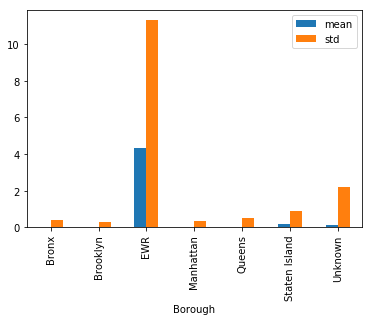

In [54]:
wei.plot.bar()

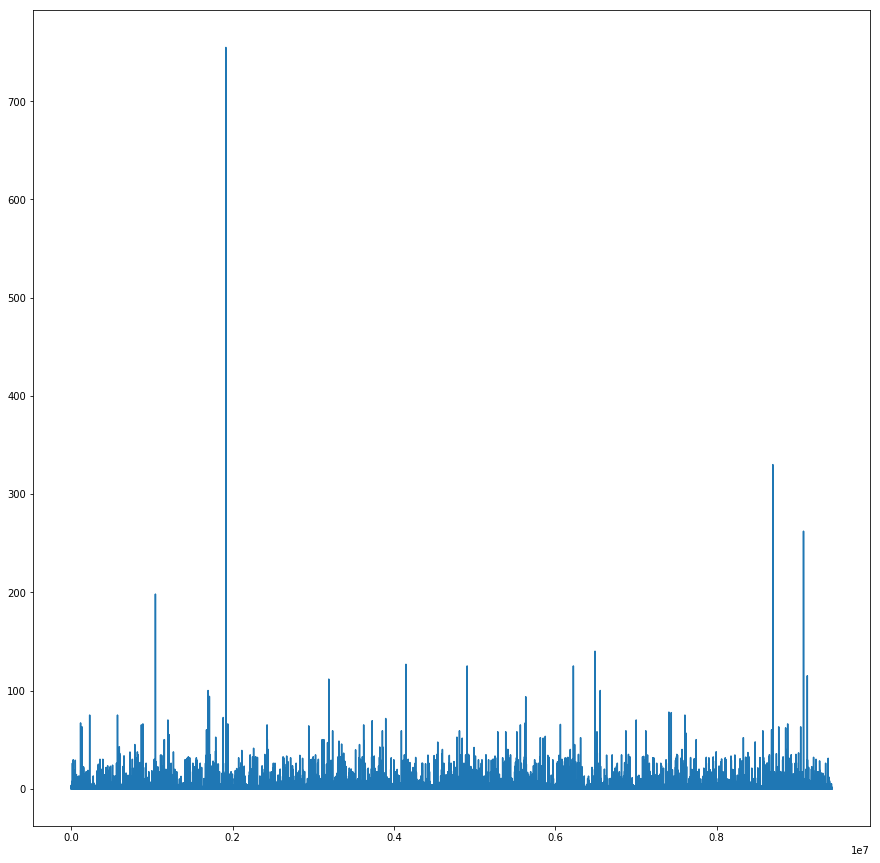

In [55]:
m01_1['price_weighted'].plot(figsize=(15,15))

In [56]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['price_weighted'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['price_weighted'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['price_weighted'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['price_weighted'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['price_weighted'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['price_weighted'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['price_weighted'])

Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
from scipy.stats import ttest_ind
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-2.2796592137114198, pvalue=0.022629516492646985)


Brooklyn EWR
Ttest_indResult(statistic=-108.79859375745481, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-108.79859375745481, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=-2.6593486040348218, pvalue=0.007829376682942975)


Brooklyn Staten
Ttest_indResult(statistic=-5.659832473704563, pvalue=1.5186278777511703e-08)


Brooklyn Unknown
Ttest_indResult(statistic=-19.091860089198217, pvalue=3.3357945541274534e-81)


Bronx EWR
Ttest_indResult(statistic=-36.505706842258434, pvalue=1.05115124869349e-273)


Bronx Manhattan
Ttest_indResult(statistic=-36.505706842258434, pvalue=1.05115124869349e-273)


Bronx Queens
Ttest_indResult(statistic=0.7364930567358979, pvalue=0.4614310000410954)


Bronx Staten
Ttest_indResult(statistic=-4.1905180176928125, pvalue=2.8077565431008054e-05)


Bronx Unknown
Ttest_indResult(statistic=-5.094015489849947, pvalue=3.509527159683417e-07)


EWR Manhat

In [ ]:
#apr

In [80]:
m01_1=m04.drop(m04[m04['fare_amount']<=0].index)
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])

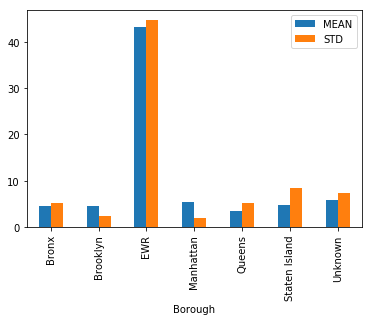

In [58]:
m01_1=m04.drop(m04[m04['fare_amount']<=0].index)
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])
cr01b_01=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].mean())
cr01b_01b=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].std())
cr01b_01=cr01b_01.merge(cr01b_01b,left_on='Borough', right_on='Borough', how='inner')
cr01b_01.columns=['MEAN', 'STD']
cr01b_01.plot.bar()

In [59]:
mpl=m01_1[m01_1['Price_per_mile']<20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


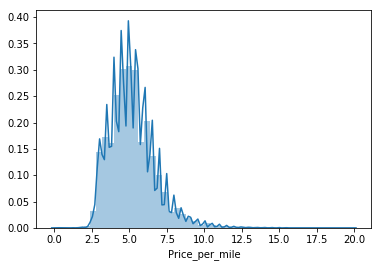

In [60]:
sns.distplot(mpl['Price_per_mile'])

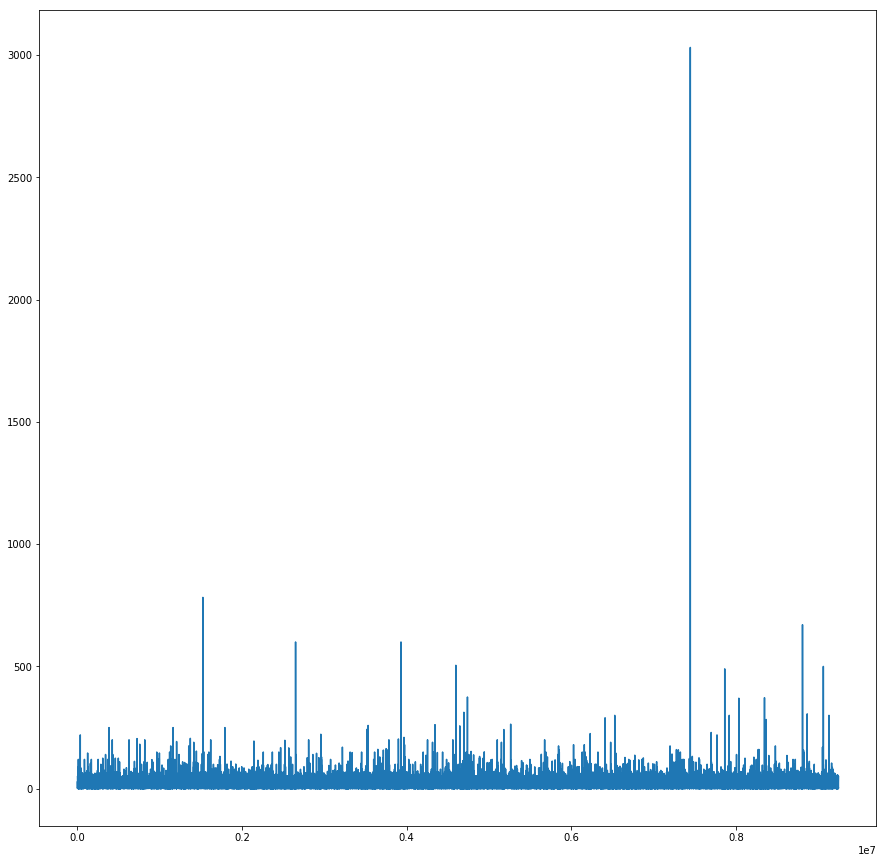

In [61]:
m01_1['Price_per_mile'].plot(figsize=(15,15))

In [62]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['Price_per_mile'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['Price_per_mile'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['Price_per_mile'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['Price_per_mile'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['Price_per_mile'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['Price_per_mile'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['Price_per_mile'])
Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=0.6866922245580008, pvalue=0.4922779543969992)


Brooklyn EWR
Ttest_indResult(statistic=-172.37458392422874, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-172.37458392422874, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=65.53108192849766, pvalue=0.0)


Brooklyn Staten
Ttest_indResult(statistic=-0.8209967816487781, pvalue=0.41164977471458286)


Brooklyn Unknown
Ttest_indResult(statistic=-55.22902097161207, pvalue=0.0)


Bronx EWR
Ttest_indResult(statistic=-64.36859893918954, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-64.36859893918954, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=18.882602203420976, pvalue=1.6736542422276806e-79)


Bronx Staten
Ttest_indResult(statistic=-0.40840116431830026, pvalue=0.6829879831458652)


Bronx Unknown
Ttest_indResult(statistic=-16.712904419489686, pvalue=1.2041343432349875e-62)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.0)


EWR Queens
Ttest_indResult(sta

In [81]:
m01_1['price_weighted'] = m01_1['Price_per_mile'] / m01_1['duration_sec']
w1=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].mean())
w2=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].std())
w2.columns = ['std']
w1.columns= ['mean']
wei= w1.join(w2)
wei

,mean,std
Borough,,
Bronx,0.020832,0.370234
Brooklyn,0.015525,0.281495
EWR,4.601098,11.653366
Manhattan,0.012471,0.150427
Queens,0.019733,0.602227
Staten Island,0.090791,0.422025
Unknown,0.142875,2.141473


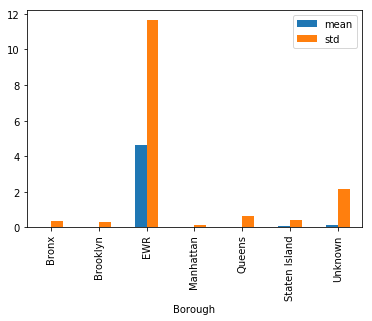

In [64]:
wei.plot.bar()

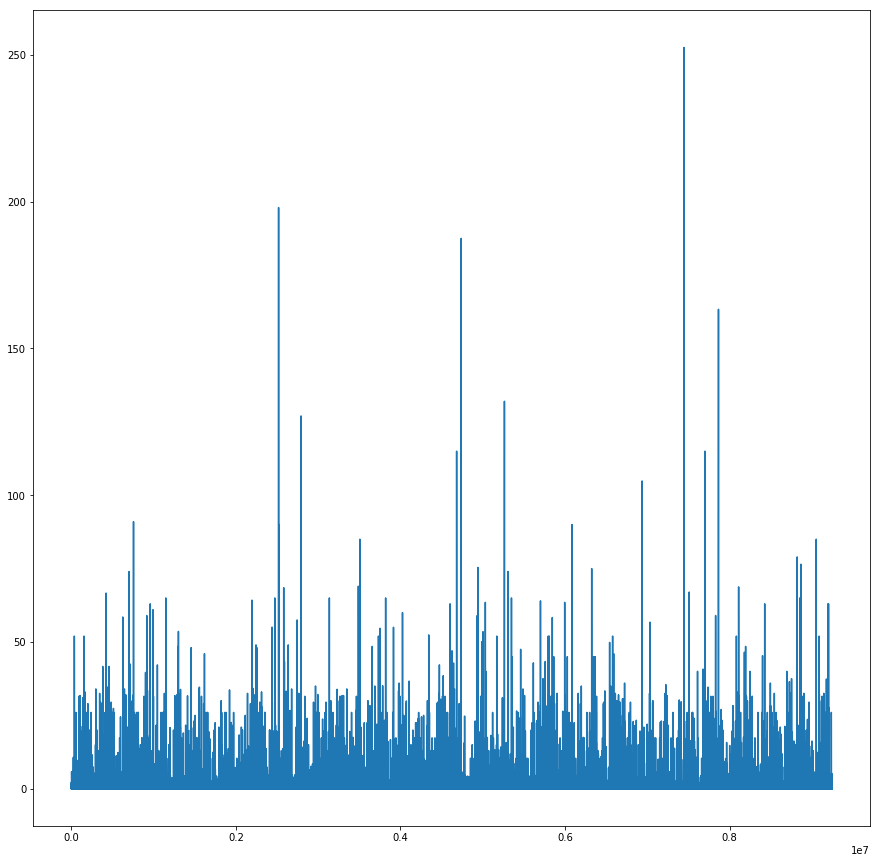

In [82]:
m01_1['price_weighted'].plot(figsize=(15,15))

In [83]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['price_weighted'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['price_weighted'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['price_weighted'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['price_weighted'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['price_weighted'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['price_weighted'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['price_weighted'])

Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
from scipy.stats import ttest_ind
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-1.74758964151878, pvalue=0.08053753245459612)


Brooklyn EWR
Ttest_indResult(statistic=-114.6172990496164, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-114.6172990496164, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=-2.3384869217349493, pvalue=0.019362283521967158)


Brooklyn Staten
Ttest_indResult(statistic=-2.548416570087791, pvalue=0.010822583219015563)


Brooklyn Unknown
Ttest_indResult(statistic=-20.184491219797586, pvalue=1.5766588572209807e-90)


Bronx EWR
Ttest_indResult(statistic=-38.04742738776156, pvalue=5.509391417190932e-296)


Bronx Manhattan
Ttest_indResult(statistic=-38.04742738776156, pvalue=5.509391417190932e-296)


Bronx Queens
Ttest_indResult(statistic=0.1804090482054269, pvalue=0.8568315131525354)


Bronx Staten
Ttest_indResult(statistic=-1.7918372880745868, pvalue=0.07318946425788057)


Bronx Unknown
Ttest_indResult(statistic=-5.648121720893296, pvalue=1.6250447796443795e-08)


EWR Manhattan
Ttest

In [ ]:
#may

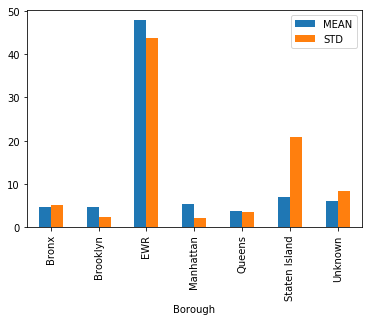

In [71]:
m01_1=m05.drop(m05[m05['fare_amount']<=0].index)
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])
cr01b_01=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].mean())
cr01b_01b=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].std())
cr01b_01=cr01b_01.merge(cr01b_01b,left_on='Borough', right_on='Borough', how='inner')
cr01b_01.columns=['MEAN', 'STD']
cr01b_01.plot.bar()

In [72]:
mpl=m01_1[m01_1['Price_per_mile']<20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


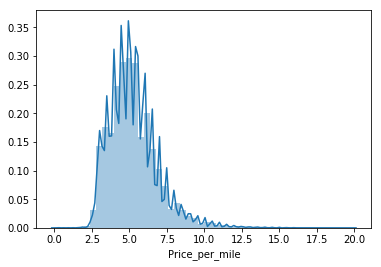

In [73]:
sns.distplot(mpl['Price_per_mile'])

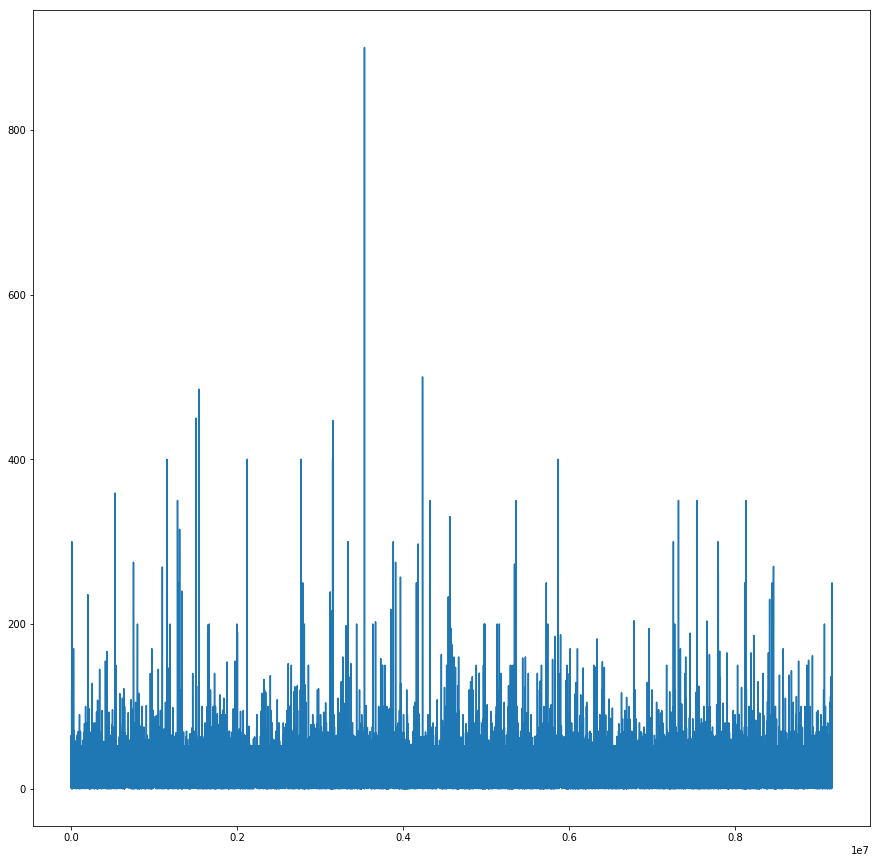

In [74]:
m01_1['Price_per_mile'].plot(figsize=(15,15))

In [75]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['Price_per_mile'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['Price_per_mile'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['Price_per_mile'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['Price_per_mile'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['Price_per_mile'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['Price_per_mile'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['Price_per_mile'])
Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=0.42708481843718066, pvalue=0.6693182533123624)


Brooklyn EWR
Ttest_indResult(statistic=-220.68378190117605, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-220.68378190117605, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=89.10238676517473, pvalue=0.0)


Brooklyn Staten
Ttest_indResult(statistic=-10.782209627177723, pvalue=4.2978963577002174e-27)


Brooklyn Unknown
Ttest_indResult(statistic=-60.45705304642396, pvalue=0.0)


Bronx EWR
Ttest_indResult(statistic=-78.56905604375936, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-78.56905604375936, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=26.202529763551393, pvalue=3.0210442293087316e-151)


Bronx Staten
Ttest_indResult(statistic=-4.543025560237037, pvalue=5.60805546514829e-06)


Bronx Unknown
Ttest_indResult(statistic=-18.091867582224648, pvalue=4.556953632746454e-73)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.0)


EWR Queens
Ttest_indResult

In [76]:
m01_1['price_weighted'] = m01_1['Price_per_mile'] / m01_1['duration_sec']
w1=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].mean())
w2=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].std())
w2.columns = ['std']
w1.columns= ['mean']
wei= w1.join(w2)
wei

,mean,std
Borough,,
Bronx,0.021501,0.366319
Brooklyn,0.014614,0.275847
EWR,5.346593,12.556288
Manhattan,0.012402,0.156136
Queens,0.019912,0.498275
Staten Island,0.309489,1.933649
Unknown,0.187313,2.398701


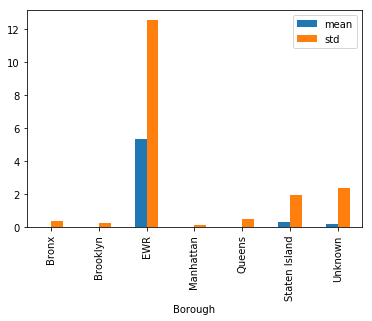

In [77]:
wei.plot.bar()

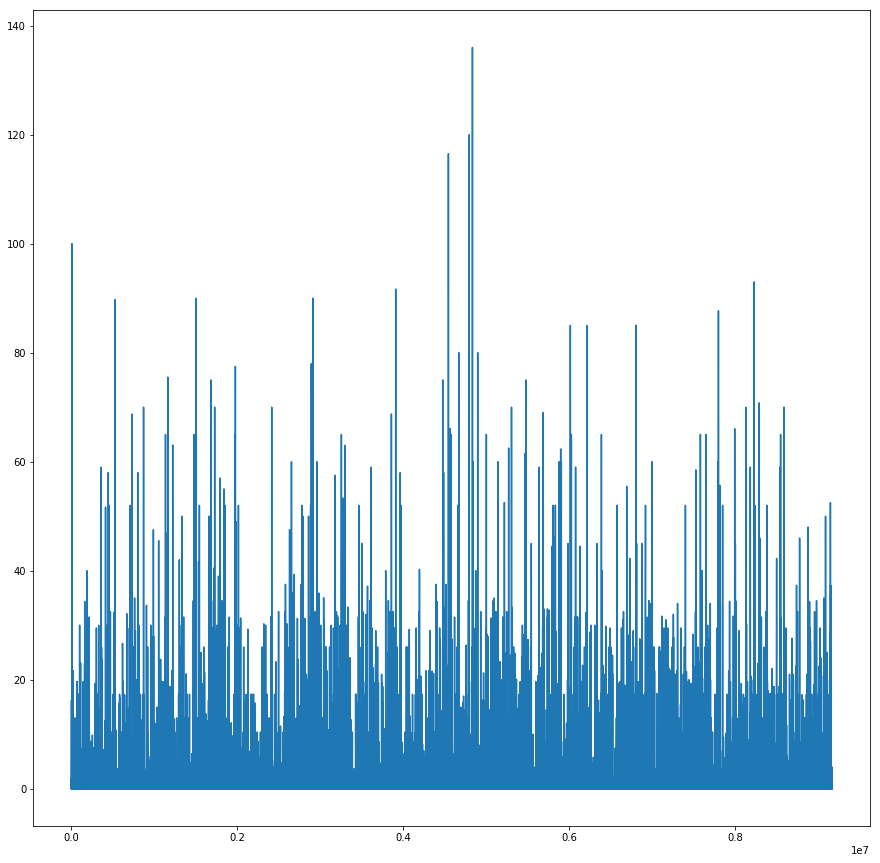

In [78]:
m01_1['price_weighted'].plot(figsize=(15,15))

In [79]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['price_weighted'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['price_weighted'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['price_weighted'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['price_weighted'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['price_weighted'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['price_weighted'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['price_weighted'])

Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
from scipy.stats import ttest_ind
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-2.3549021769725877, pvalue=0.018529051573303857)


Brooklyn EWR
Ttest_indResult(statistic=-131.47481375611778, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-131.47481375611778, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=-3.582103439357106, pvalue=0.00034086131803898466)


Brooklyn Staten
Ttest_indResult(statistic=-11.298698859086986, pvalue=1.3781933118492602e-29)


Brooklyn Unknown
Ttest_indResult(statistic=-24.830222192368257, pvalue=6.305248877426895e-136)


Bronx EWR
Ttest_indResult(statistic=-42.161044436905755, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-42.161044436905755, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=0.32110862204843227, pvalue=0.7481281871761036)


Bronx Staten
Ttest_indResult(statistic=-7.412282340174885, pvalue=1.3385756703715847e-13)


Bronx Unknown
Ttest_indResult(statistic=-6.983843096510703, pvalue=2.8860386660476845e-12)


EWR Manhattan
Ttest_indResult(statistic=0.0

In [ ]:
# june

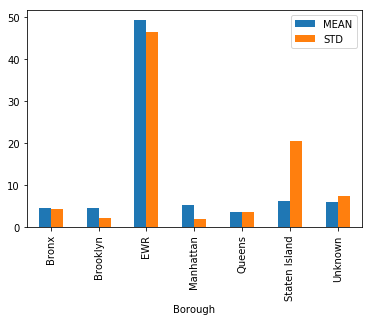

In [85]:
m01_1=m06.drop(m06[m06['fare_amount']<=0].index)
m01_1=m01_1.drop(m01_1[m01_1['trip_distance']<0].index)
m01_1['Price_per_mile']=np.where(m01_1['trip_distance']>=1,
                                 m01_1['fare_amount']/m01_1['trip_distance'],m01_1['fare_amount'])
cr01b_01=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].mean())
cr01b_01b=pd.DataFrame(m01_1.groupby(['Borough'])['Price_per_mile'].std())
cr01b_01=cr01b_01.merge(cr01b_01b,left_on='Borough', right_on='Borough', how='inner')
cr01b_01.columns=['MEAN', 'STD']
cr01b_01.plot.bar()

In [86]:
mpl=m01_1[m01_1['Price_per_mile']<20]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


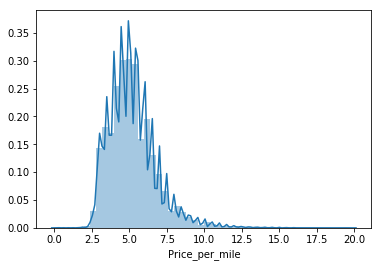

In [87]:
sns.distplot(mpl['Price_per_mile'])

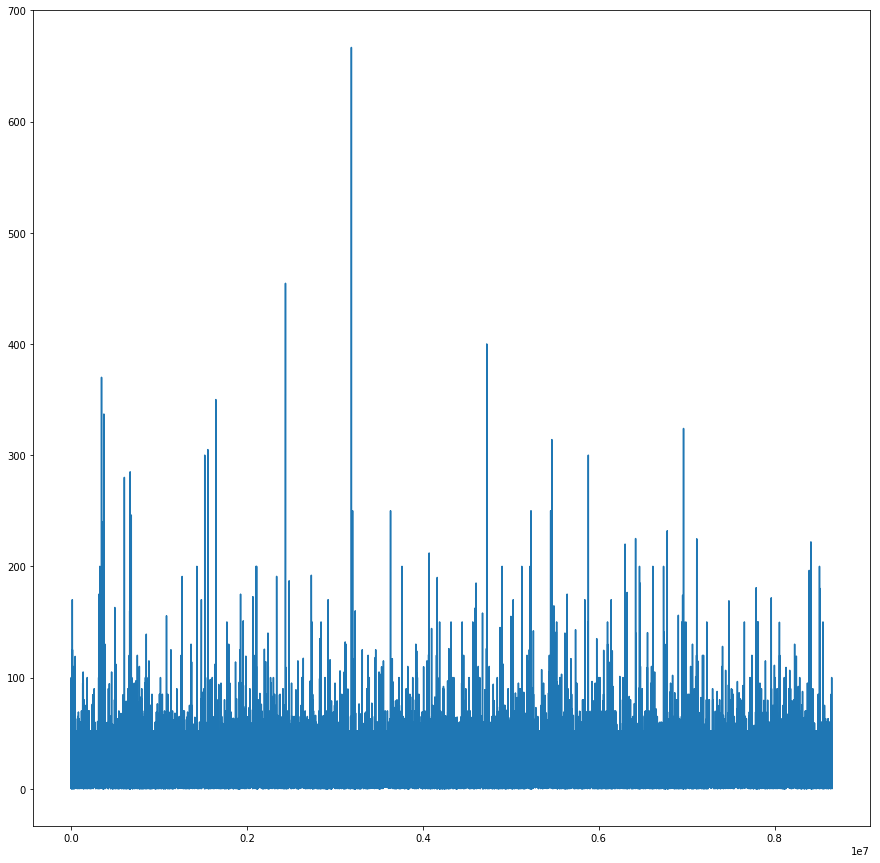

In [88]:
m01_1['Price_per_mile'].plot(figsize=(15,15))

In [89]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['Price_per_mile'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['Price_per_mile'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['Price_per_mile'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['Price_per_mile'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['Price_per_mile'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['Price_per_mile'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['Price_per_mile'])
Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=1.8796654567155722, pvalue=0.06015591531424495)


Brooklyn EWR
Ttest_indResult(statistic=-213.00578761463004, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-213.00578761463004, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=84.77191213842956, pvalue=0.0)


Brooklyn Staten
Ttest_indResult(statistic=-8.064743456721345, pvalue=7.405443249954395e-16)


Brooklyn Unknown
Ttest_indResult(statistic=-62.24470455212356, pvalue=0.0)


Bronx EWR
Ttest_indResult(statistic=-78.85233054404446, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-78.85233054404446, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=23.259896237669242, pvalue=1.2852634866506844e-119)


Bronx Staten
Ttest_indResult(statistic=-3.9447998307576797, pvalue=8.042825276966346e-05)


Bronx Unknown
Ttest_indResult(statistic=-18.74287553553664, pvalue=2.833334379801142e-78)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.0)


EWR Queens
Ttest_indResult(

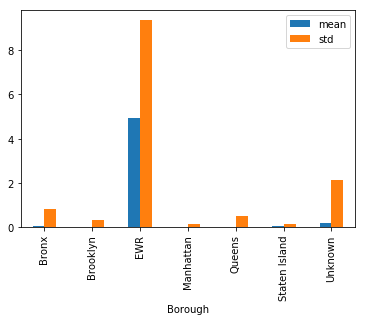

In [90]:
m01_1['price_weighted'] = m01_1['Price_per_mile'] / m01_1['duration_sec']
w1=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].mean())
w2=pd.DataFrame(m01_1.groupby(['Borough'])['price_weighted'].std())
w2.columns = ['std']
w1.columns= ['mean']
wei= w1.join(w2)
wei.plot.bar()

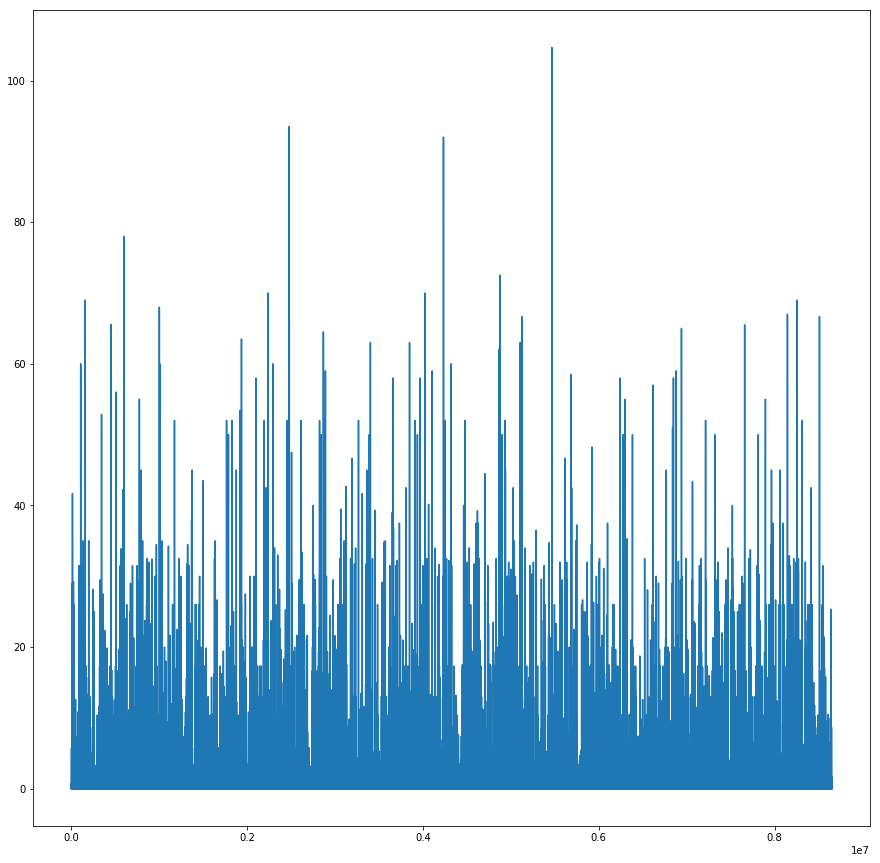

In [91]:
m01_1['price_weighted'].plot(figsize=(15,15))

In [92]:
m01_Brooklyn=m01_1[m01_1['Borough']=='Brooklyn']
l01_Br=np.array(m01_Brooklyn['price_weighted'])
#np.std(m01_Brooklyn['Price_per_mile'])
m01_Bronx=m01_1[m01_1['Borough']=='Bronx']
l01_Bronx=np.array(m01_Bronx['price_weighted'])
m01_EWR=m01_1[m01_1['Borough']=='EWR']
l01_EWR=np.array(m01_EWR['price_weighted'])
m01_Manhattan=m01_1[m01_1['Borough']=='Manhattan']
l01_Manhattan=np.array(m01_EWR['price_weighted'])
m01_Queens=m01_1[m01_1['Borough']=='Queens']
l01_Queens=np.array(m01_Queens['price_weighted'])
m01_Staten=m01_1[m01_1['Borough']=='Staten Island']
l01_Staten=np.array(m01_Staten['price_weighted'])
m01_Unknown=m01_1[m01_1['Borough']=='Unknown']
l01_Unknown=np.array(m01_Unknown['price_weighted'])

Bigl=[l01_Br, l01_Bronx, l01_EWR, l01_Manhattan,l01_Queens,l01_Staten,l01_Unknown]
Bigl1=['Brooklyn', 'Bronx', 'EWR', 'Manhattan','Queens','Staten','Unknown']
from scipy.stats import ttest_ind
c=0
a=[]
for x in range(len(Bigl)):
    for y in range(len(Bigl)):
        
        #print(x,y)
        #if 'x'!='y':
        #ttest=ttest_ind(x,y)
        if x!=y and (Bigl1[x]+' '+Bigl1[y]) not in a:
            print(Bigl1[x]+' '+Bigl1[y])
            a.append(Bigl1[y]+' '+Bigl1[x])
            print(ttest_ind(Bigl[x],Bigl[y]))
            print('\n')
            c=c+1
print(c)

Brooklyn Bronx
Ttest_indResult(statistic=-4.282652869242323, pvalue=1.8481013054251593e-05)


Brooklyn EWR
Ttest_indResult(statistic=-139.316152940229, pvalue=0.0)


Brooklyn Manhattan
Ttest_indResult(statistic=-139.316152940229, pvalue=0.0)


Brooklyn Queens
Ttest_indResult(statistic=-4.219759591782143, pvalue=2.445946351197423e-05)


Brooklyn Staten
Ttest_indResult(statistic=-0.721178836071442, pvalue=0.47080088646735807)


Brooklyn Unknown
Ttest_indResult(statistic=-25.320475450843922, pvalue=2.936727188427787e-141)


Bronx EWR
Ttest_indResult(statistic=-43.805905728111284, pvalue=0.0)


Bronx Manhattan
Ttest_indResult(statistic=-43.805905728111284, pvalue=0.0)


Bronx Queens
Ttest_indResult(statistic=2.174804974366458, pvalue=0.029645144911200513)


Bronx Staten
Ttest_indResult(statistic=-0.04862543378575794, pvalue=0.9612188000568004)


Bronx Unknown
Ttest_indResult(statistic=-6.391577820902833, pvalue=1.647562318870127e-10)


EWR Manhattan
Ttest_indResult(statistic=0.0, pvalue=1.

## CR2

In [93]:
import folium
import json
import os

In [94]:
mjson = os.path.join('data', 'C:\\Users\\user\\Documents\\HW2_ADS\\yellow\\taxi_zones.json')

In [95]:
geo_json_data = json.load(open(mjson))

In [101]:
map_do = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m01['PULocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do)



In [102]:
map_do.save('pick01.html')

In [104]:
map_do1 = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do1.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m01['DOLocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do1)

In [105]:
map_do1.save('drop01.html')

In [106]:
map_do = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m02['PULocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do)

map_do.save('pick02.html')

In [107]:
map_do1 = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do1.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m02['DOLocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do1)
map_do1.save('drop02.html')

In [114]:
map_do = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m03['PULocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do)

map_do.save('pick03.html')

In [110]:
map_do1 = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do1.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m03['DOLocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do1)
map_do1.save('drop03.html')

In [112]:
map_do = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m04['PULocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do)

map_do.save('pick04.html')

In [113]:
map_do1 = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do1.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m04['DOLocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do1)
map_do1.save('drop04.html')

In [115]:
map_do = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m05['PULocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do)

map_do.save('pick05.html')

In [116]:
map_do1 = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do1.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m05['DOLocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do1)
map_do1.save('drop05.html')

In [117]:
map_do = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m06['PULocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do)

map_do.save('pick06.html')

In [118]:
map_do1 = folium.Map([40, -73], tiles='cartodbpositron', zoom_start=9)
#[-74.18445299999996, 40.69499599999988]


map_do1.choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=m06['DOLocationID'],
    #columns=['borough', 'Trips'],
    key_on='feature.properties.LocationID',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pickups'
)


folium.LayerControl().add_to(map_do1)
map_do1.save('drop06.html')